# Baseball Statistics: Sprint 2

**Course:** CSDA1100  
**Written by:** Samrul Aahad, Matshediso Sue Manubata, Rayah Mian, Paulo Silva  
**Due Date:** Tuesday, June 27, 2023

-------------------------------------------------------------------------

## 1) Introduction

### Business Problem

The objective of this report is to investigate the importance of offensive and defensive strategies with respect to the number of games won in baseball. We aim to discover insights that can aid teams and coaches to optimize their strategies and maximize their chances of winning future games. We will do this by analyzing various relationships between offensive and defensive statistics against games won from the years 1871 to 2010. In addition, we will analyze these statistics in four different time periods: 

- Period 1: before 1920
- Period 2: 1920 to 1960
- Period 3: 1960 to 1990
- Period 4: 1990 to 2010

### Analytical Objectives

This report will conduct the following:
1. Statistical analysis to determine which offensive statistics have a significant impact on the outcome of games
2. Analyze the relationship between various defensive factors and the number of games won
3. Examine the performance of offensive and defensive strategies during different time periods (Periods 1 to 4)
4. Conduct exploratory data analysis to identify trends, patterns, and correlations among offensive and defensive statistics and games won

By performing these analyses, we aim to learn: 
1. Key offensive statistics that significantly affect the number of games won
2. The impact of defensive factors on team performance and the likelihood of winning
3. The effectiveness of different strategies across specific time periods
4. Trends and patterns in the data for informed decision-making

Through these analyses, we aim to provide valuable insights to baseball teams, coaches, and decision-makers, helping them to allocate resources effectively, optimize their strategies, and increase their chances of winning games.

## 2) Linear Regression Models

### Exploratory Data Analysis

We will perform an exploratory data analysis on each time period to understand the distributions, relationships and trends of the variables. We will also calculate summary statistics of the data and create visualizations such as histograms, scatter plots, and line plots to gain insights into the variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import seaborn as sns

# Allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
# Read baseball_teams.csv file 
df = pd.read_csv('baseball_teams.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 2805 non-null   int64  
 1   League               2755 non-null   object 
 2   Team                 2805 non-null   object 
 3   Franchise            2805 non-null   object 
 4   Division             1288 non-null   object 
 5   Final_Standing       2805 non-null   int64  
 6   Games_Played         2805 non-null   int64  
 7   Unnamed: 7           2406 non-null   float64
 8   Games_Won            2805 non-null   int64  
 9   Games_Lost           2805 non-null   int64  
 10  Unnamed: 10          1260 non-null   object 
 11  Unnamed: 11          624 non-null    object 
 12  League_Win           2777 non-null   object 
 13  World_Series         2448 non-null   object 
 14  Runs_Scored          2805 non-null   int64  
 15  At_Bats              2805 non-null   i

In [3]:
# Cleaning Data
df = df.drop(columns=['Unnamed: 7', 'Games_Lost', 'Hit_By_Pitch', 'Sacrifice_Fly', 'Complete_Games', 'Attendance'])
df = df.select_dtypes(include=np.number)
columns = df.columns.values
print(columns)

['Year ' 'Final_Standing' 'Games_Played' 'Games_Won' 'Runs_Scored'
 'At_Bats' 'Hits' 'Doubles' 'Triples' 'Home_Runs' 'Walks' 'Strike_Outs'
 'Stolen_Bases' 'Caught_Stealing' 'Runs_Against' 'Earned_Runs'
 'Earned_Run_Average' 'Shutout' 'Saves' 'Infield_Put_Outs' 'Hits_Allowed'
 'Home_Run_Allowed' 'Walks_Allowed' 'Strikeouts_Allowed' 'Errors'
 'Double_Plays' 'Fielding_Percentage']


In [4]:
df.describe()

,Year,Final_Standing,Games_Played,Games_Won,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,2805.000000,2805.000000,2805.00000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.00000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2488.000000,2805.000000
mean,1955.036720,4.107308,150.34795,74.749020,681.945811,5142.492335,1346.273440,227.624955,47.10410,101.136542,...,9.664171,23.667736,4022.383244,1346.083779,101.136542,474.010695,731.229234,186.337255,140.186495,0.961519
std,41.519083,2.323414,23.22725,17.640402,135.738244,750.551691,219.891603,58.692602,22.26862,61.468300,...,5.097328,16.281300,630.996942,219.521064,58.245002,131.890032,296.409881,107.657444,29.322764,0.030224
min,1871.000000,1.000000,6.00000,0.000000,24.000000,211.000000,33.000000,3.000000,0.00000,0.000000,...,0.000000,0.000000,162.000000,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000
25%,1919.000000,2.000000,153.00000,66.000000,613.000000,5127.000000,1299.000000,193.000000,31.00000,42.000000,...,6.000000,9.000000,4077.000000,1288.000000,46.000000,427.000000,501.000000,116.000000,126.000000,0.960000
50%,1963.000000,4.000000,157.00000,77.000000,690.000000,5389.000000,1393.000000,231.000000,41.00000,107.000000,...,9.000000,24.000000,4236.000000,1392.000000,109.000000,494.000000,735.000000,145.000000,145.000000,0.970000
75%,1992.000000,6.000000,162.00000,87.000000,763.000000,5517.000000,1467.000000,270.000000,60.00000,149.000000,...,13.000000,38.000000,4341.000000,1470.000000,148.000000,555.000000,965.000000,217.000000,159.250000,0.980000
max,2015.000000,13.000000,165.00000,116.000000,1220.000000,5781.000000,1783.000000,376.000000,150.00000,264.000000,...,32.000000,68.000000,4518.000000,1993.000000,241.000000,827.000000,1450.000000,639.000000,217.000000,0.991000


<Axes: title={'center': 'Baseball Statistics Box Plots (Figure A)'}>

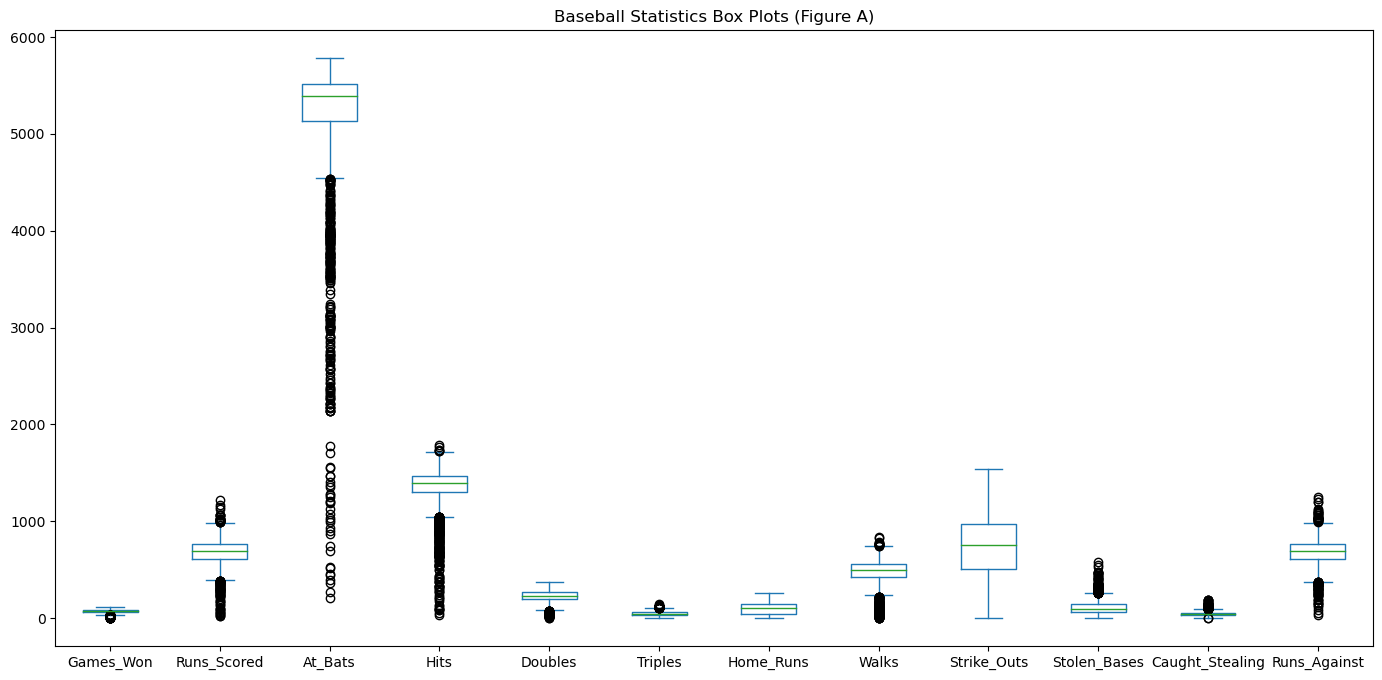

In [5]:
# Box Plots
plt.rcParams["figure.figsize"] = (17, 8)
dfA = df.iloc[:,3:15]
dfA.plot(kind = 'box', title = 'Baseball Statistics Box Plots (Figure A)')

<Axes: title={'center': 'Baseball Statistics Box Plots (Figure B)'}>

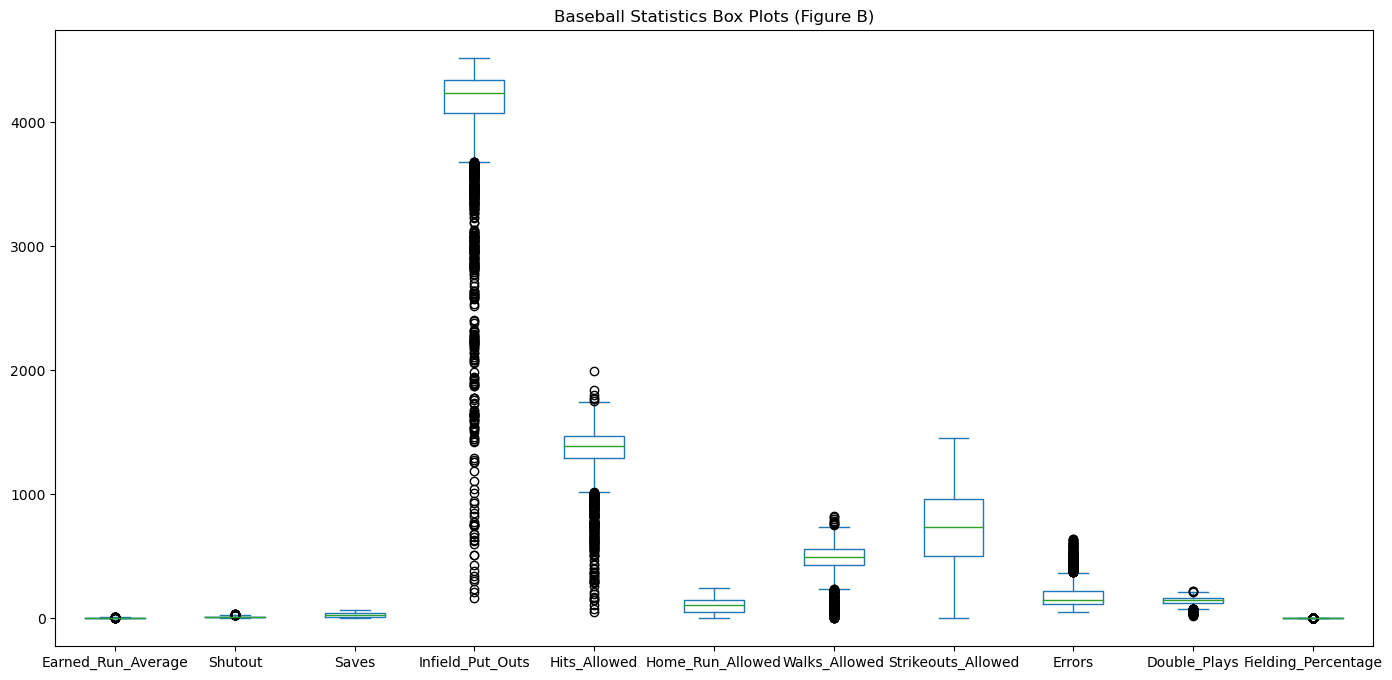

In [6]:
dfB = df.iloc[:,16:]
dfB.plot(kind = 'box', title = 'Baseball Statistics Box Plots (Figure B)')

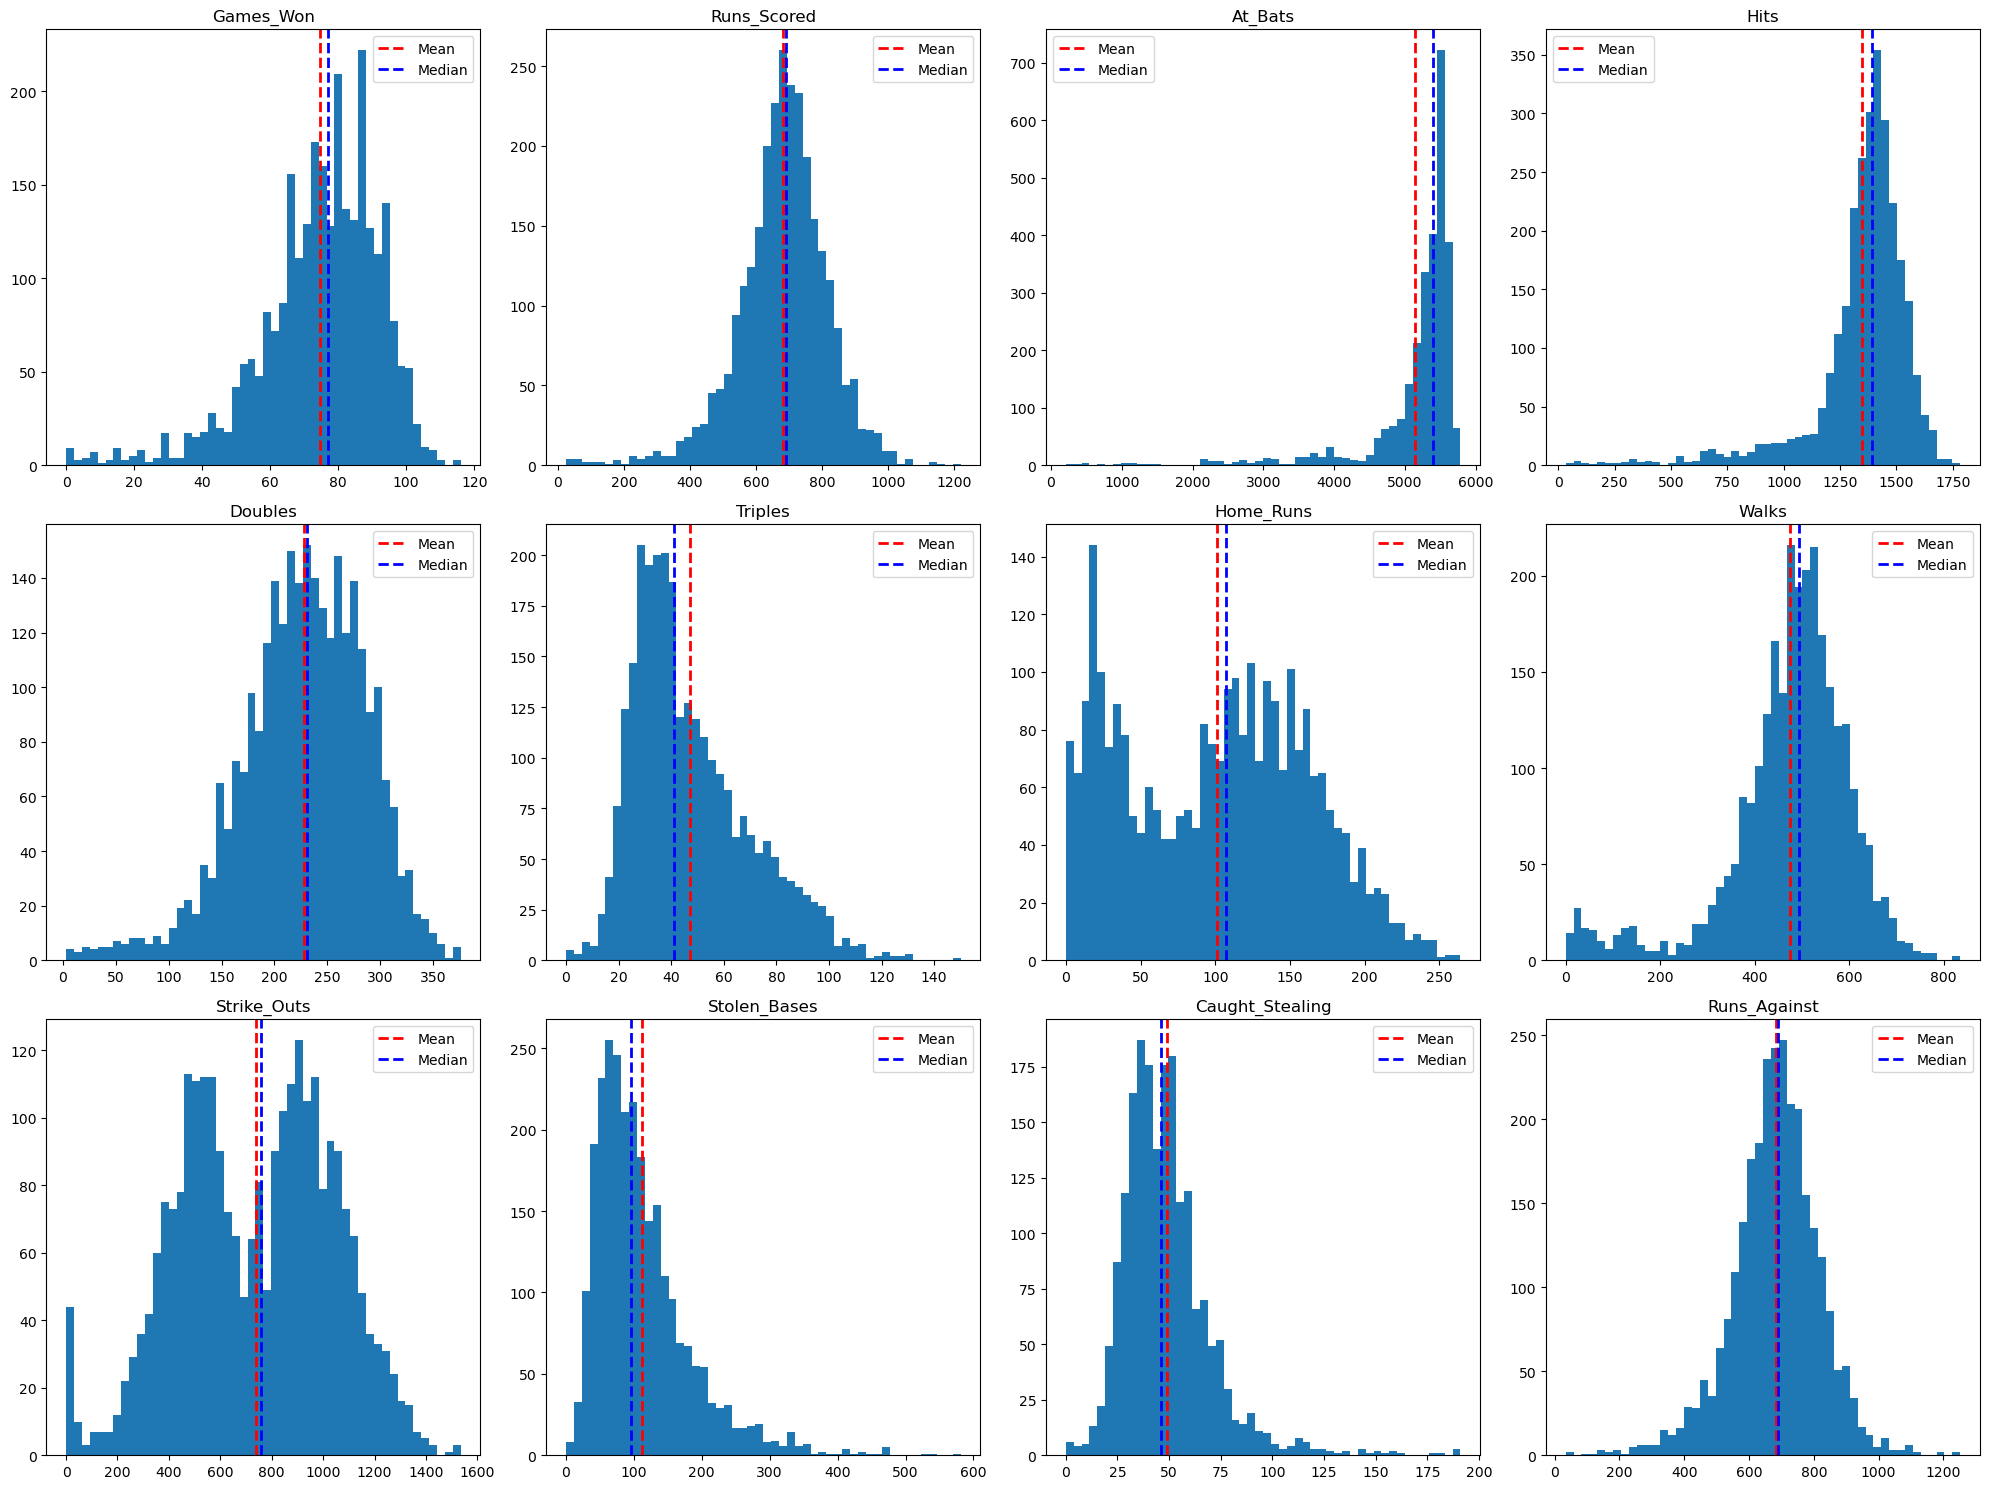

In [7]:
# Histograms
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for ax, column in zip(axes.flatten(), dfA.columns):
    ax.hist(dfA[column], bins=50)
    ax.axvline(dfA[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(dfA[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

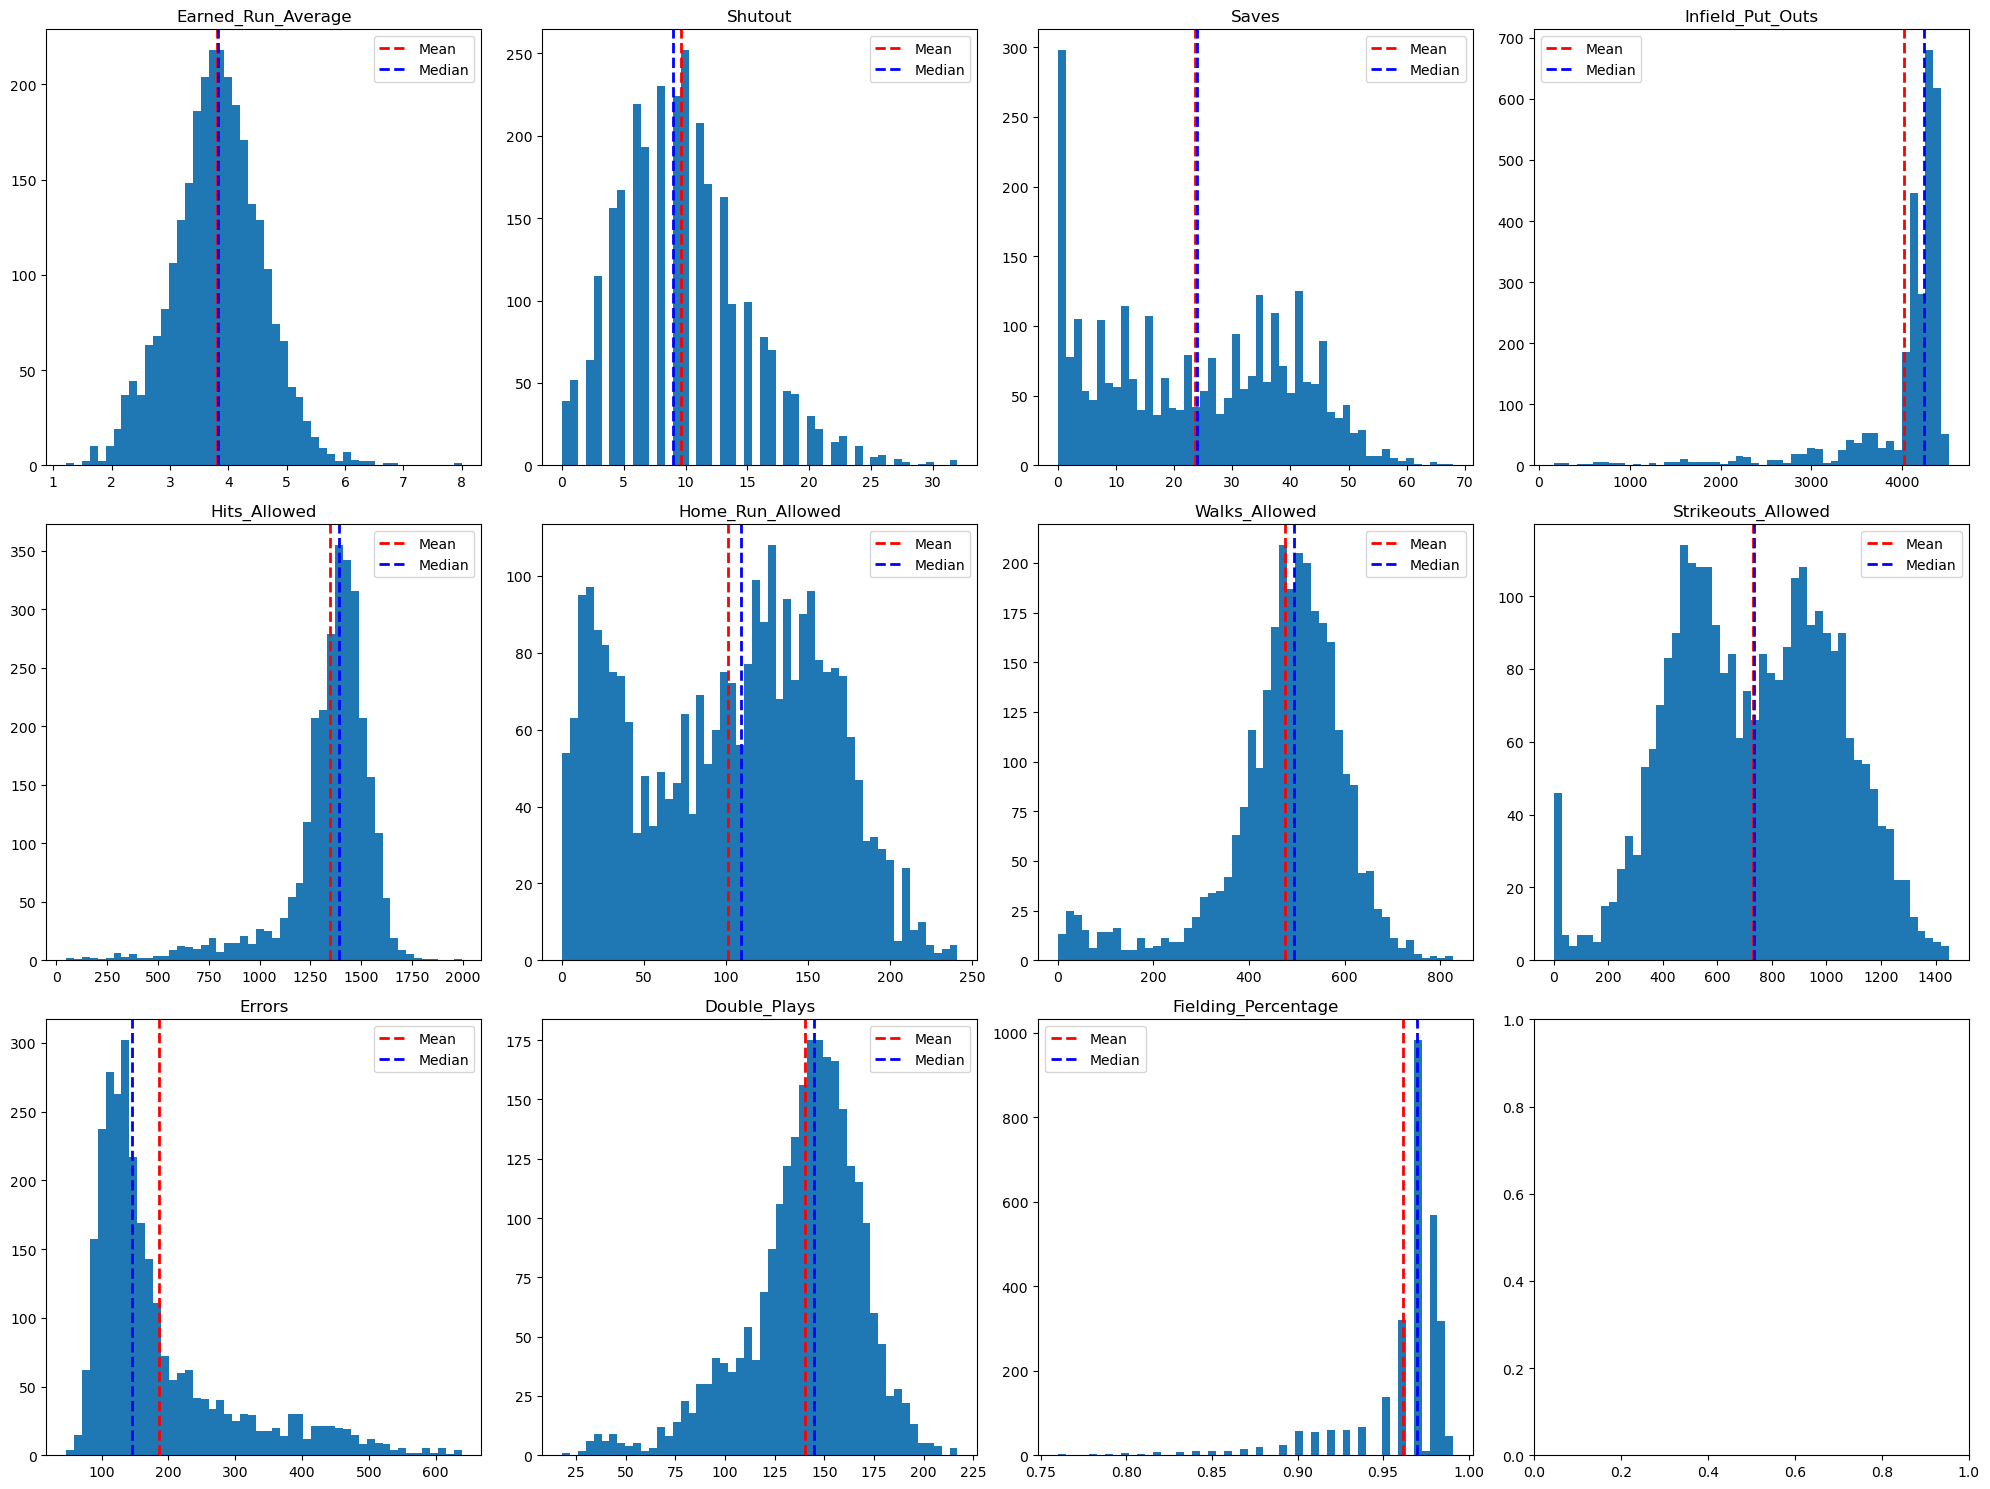

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
for ax, column in zip(axes.flatten(), dfB.columns):
    ax.hist(dfB[column], bins=50)
    ax.axvline(dfB[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(dfB[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

## 2.1) Period 1: Before 1920

### Variable Selection

Using the baseball statistics provided below, we will identify the top 4 variables for our defensive and offensive models for each period.

| **Offensive Measurements** | **Defensive Measurements** |
|:---|:---|
| Runs Scored | Runs Against |
| At Bats | Earned Runs |
| Hits | Earned Run Average |
| Doubles | Complete Games |
| Triples | Shutouts |
| Home Runs | Saves |
| Walks | Infield Put Outs |
| Strike Outs | Hits Allowed |
| Stolen Bases | Home Run Allowed |
| Caught Stealing | Walks Allowed |
| Hit by Pitch | Strikeouts Allowed |
| Sacrifice Fly | Errors |
| Defensive Measurements | Double Plays |
|  | Fielding Percentage |

In [9]:
df1 = df[(df['Year '] < 1920)]
df1.tail()

,Year,Final_Standing,Games_Played,Games_Won,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
698,1919,8,138,47,510,4746,1191,208,50,42,...,6,2,3756,1391,40,408,397,219,112.0,0.96
699,1919,4,139,71,472,4538,1132,130,82,17,...,17,4,3747,1113,23,263,391,160,89.0,0.96
700,1919,5,140,67,533,4672,1234,187,73,31,...,14,4,3768,1255,35,421,415,214,98.0,0.96
701,1919,7,138,54,463,4588,1175,163,52,18,...,6,8,3651,1146,25,415,414,217,112.0,0.96
702,1919,7,142,56,533,4757,1238,177,63,24,...,13,10,3822,1237,20,451,536,227,86.0,0.96


In [10]:
# Covariance Values
Covariance = df1.corr()
rank = Covariance['Games_Won']
rank = rank.sort_values(ascending=False)
print(rank)

Games_Won              1.000000
Caught_Stealing        0.883660
Hits                   0.808361
Infield_Put_Outs       0.779830
At_Bats                0.775265
Games_Played           0.765999
Fielding_Percentage    0.752685
Doubles                0.749308
Walks                  0.712184
Strikeouts_Allowed     0.695112
Runs_Scored            0.681313
Shutout                0.673471
Triples                0.644800
Year                   0.602368
Hits_Allowed           0.555890
Strike_Outs            0.549502
Walks_Allowed          0.532710
Saves                  0.526227
Double_Plays           0.497300
Home_Runs              0.456323
Stolen_Bases           0.430729
Earned_Runs            0.316495
Home_Run_Allowed       0.243336
Runs_Against           0.132917
Errors                -0.199159
Earned_Run_Average    -0.408200
Final_Standing        -0.635882
Name: Games_Won, dtype: float64


According to the covariance values, we have selected the following variables for our models:

| **Offensive Metrics** | **Defensive Metrics** | **Balanced Strategy** |
|:---|:---|:---|
| Caught Stealing | Infield Put Outs | Caught Stealing |
| Hits | Fielding Percentage | Hits |
| At Bats | Strikeouts Allowed | Infield Put Outs |
| Doubles | Shutouts | Fielding Percentage | 

### Model Development

We will iterate through different combinations of independent variables and build multiple regression models. Then, we will assess the performance of each model by analyzing R-squared, adjusted R-squared and F-statistics to understand the model's significance. Lastly, we will analyze the t-statistics and related p-values to evaluate whether the independent variables we selected are statistically significant.

### Offensive Model

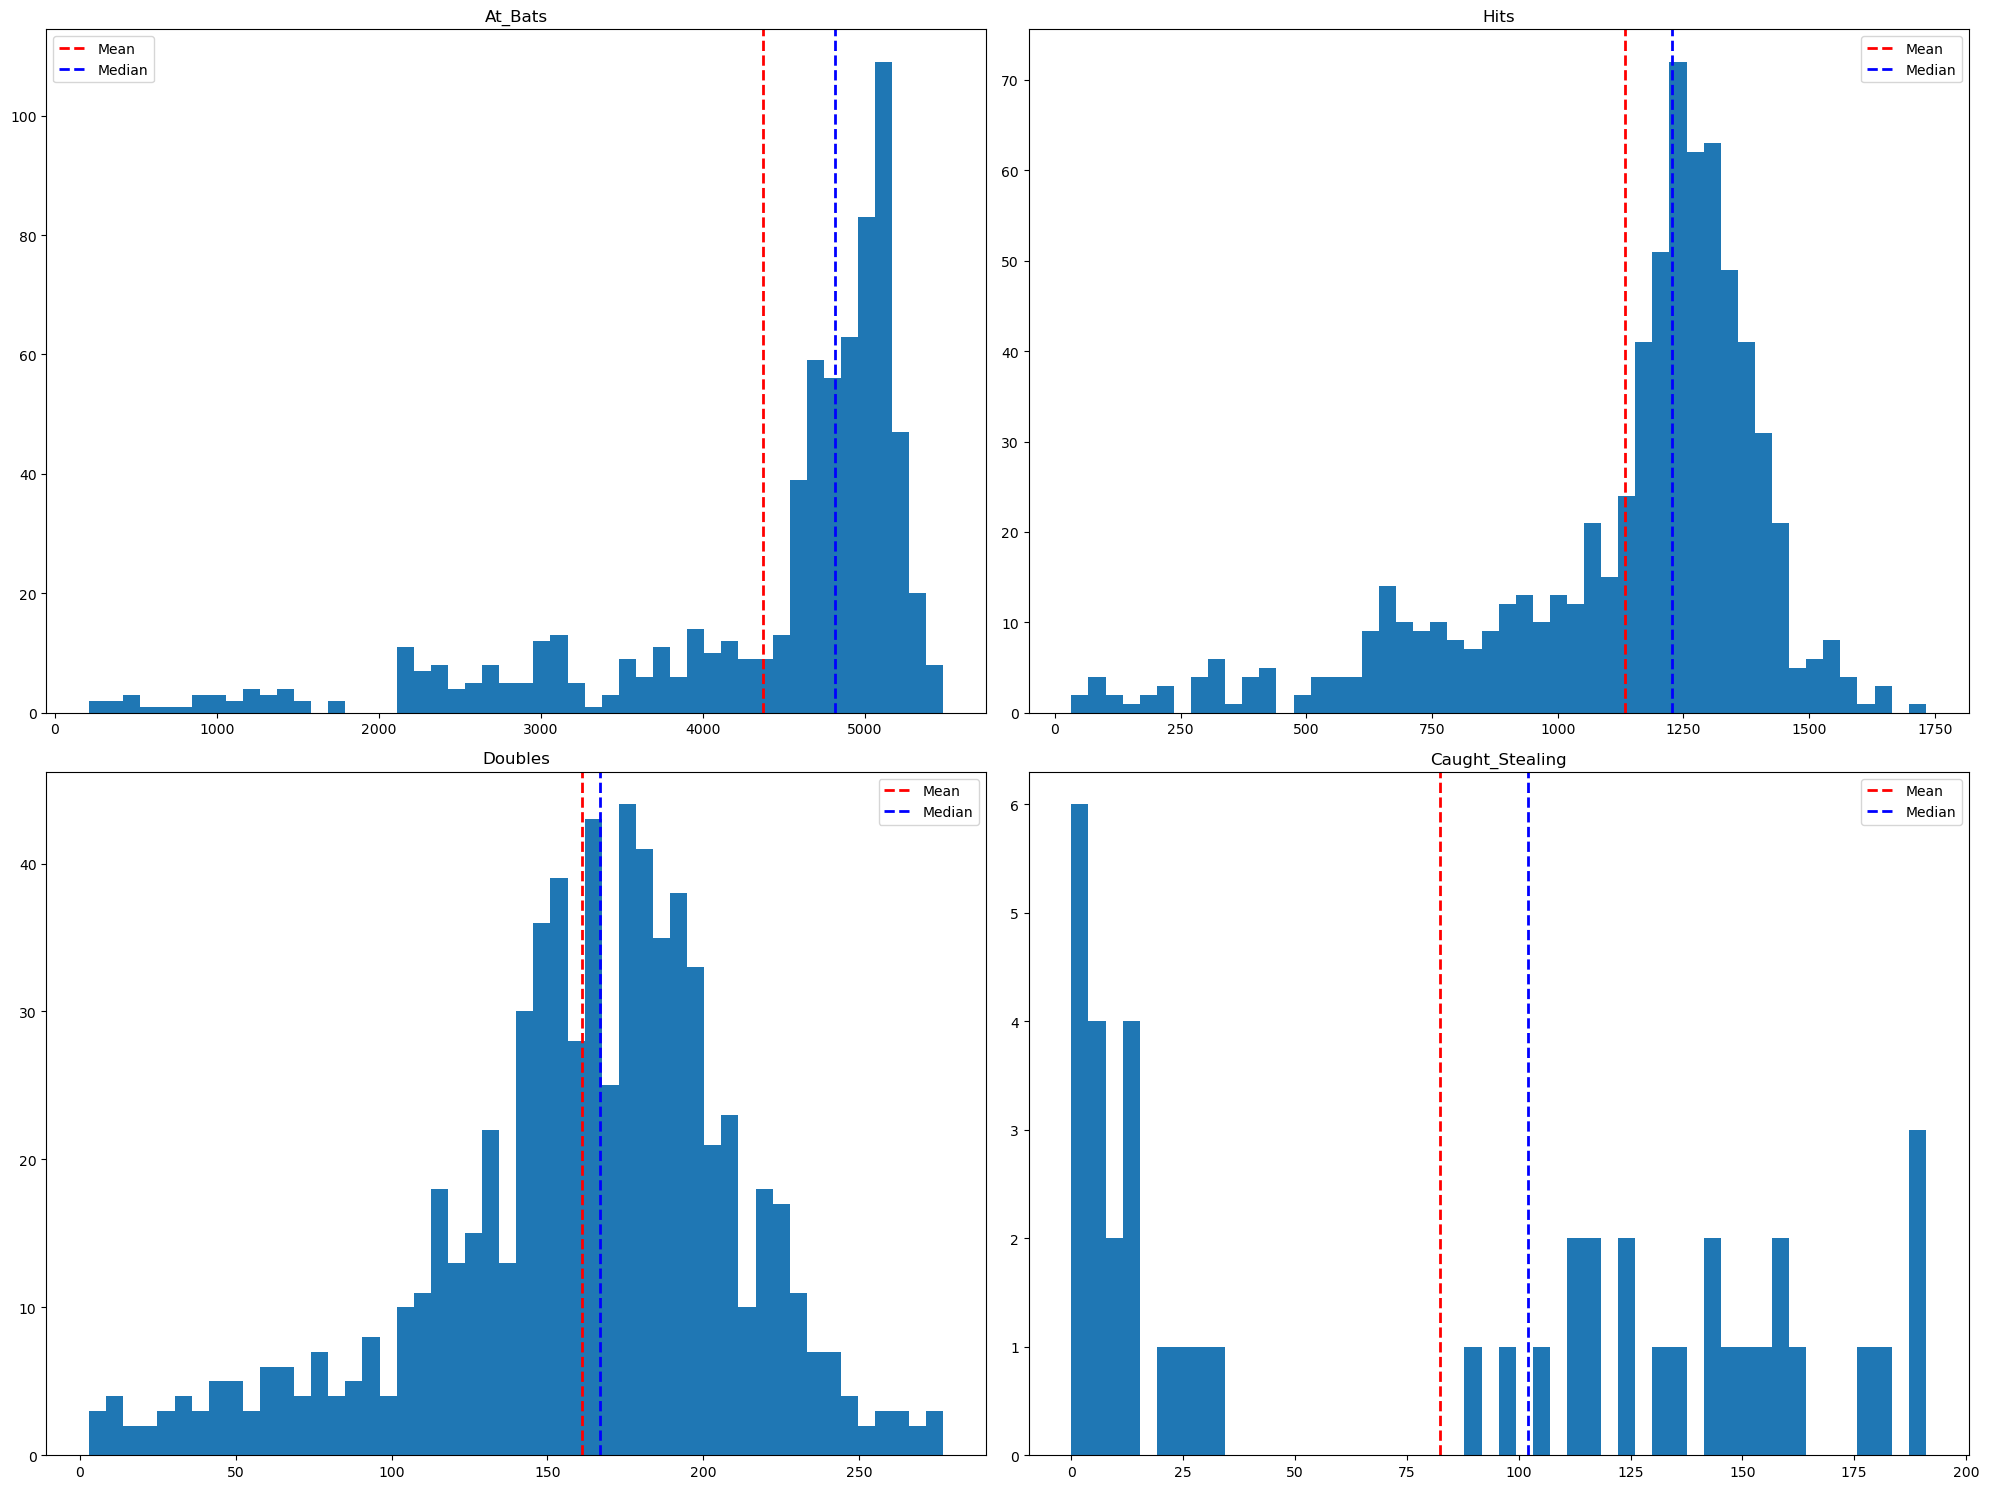

In [11]:
Off = df1[['Games_Won','At_Bats','Hits', 'Doubles', 'Caught_Stealing']]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), Off.columns[1:]):
    ax.hist(Off[column], bins=50)
    ax.axvline(Off[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(Off[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

The **null hypothesis** is that the coeffient for all the independent variables in the model is zero. For us to be able to reject the null, the P-value for each independent variable should less than 0.05 (5% significance level).

In [12]:
# Linear Regression Model for Offensive
Off = Off.dropna()

X = Off[['At_Bats','Hits', 'Doubles', 'Caught_Stealing']]
y = Off['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.971   
Dependent Variable:     Games_Won        AIC:                         332.8085
Date:                   2023-06-30 09:27 BIC:                         339.9452
No. Observations:       44               Log-Likelihood:              -162.40 
Df Model:               4                F-statistic:                 369.0   
Df Residuals:           40               Prob (F-statistic):          5.47e-31
R-squared (uncentered): 0.974            Scale:                       103.49  
---------------------------------------------------------------------------------
                    Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
---------------------------------------------------------------------------------
At_Bats            -0.0142      0.0068    -2.0798    0.0440    -0.0280    -0.0004
Hits                0.0623      0.0246     2.5366    0.0152     

All of the variables in this model are **statistically significant**. In addition, the R^2 statistic is very high at 0.974.

### Defensive Model

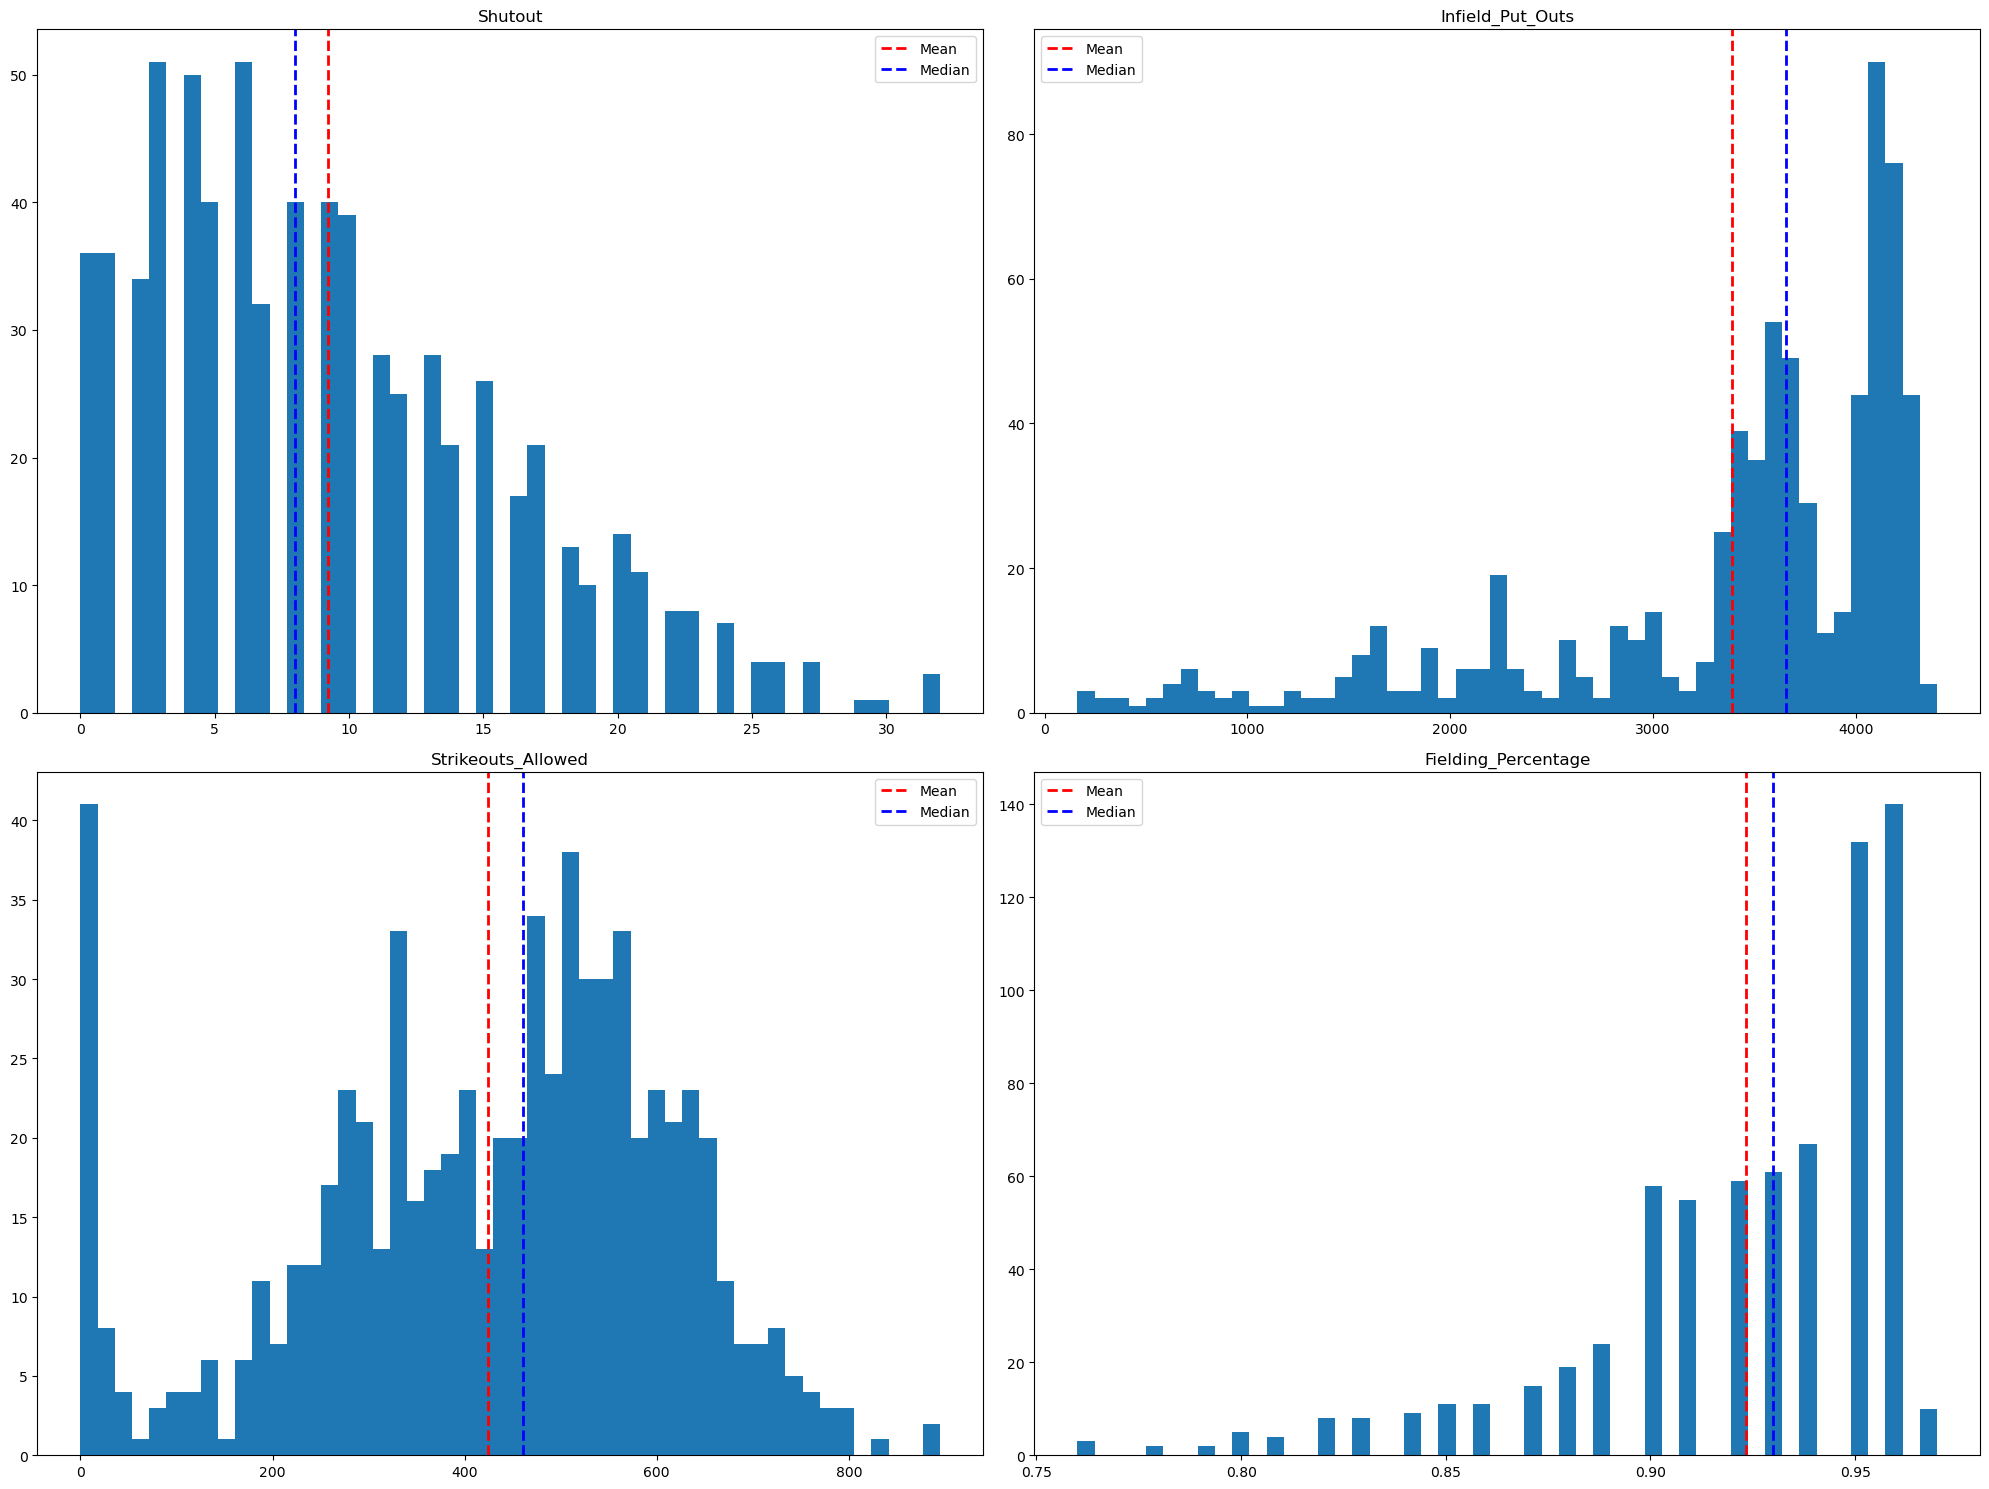

In [13]:
defensive = df1[['Games_Won','Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Fielding_Percentage']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), defensive.columns[1:]):
    ax.hist(defensive[column], bins=50)
    ax.axvline(defensive[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(defensive[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [14]:
# Linear Regression Model for Defensive
defensive = defensive.dropna()

X = defensive[['Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Fielding_Percentage']]
y = defensive['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.961    
Dependent Variable:     Games_Won        AIC:                         5620.0594
Date:                   2023-06-30 09:27 BIC:                         5638.2808
No. Observations:       703              Log-Likelihood:              -2806.0  
Df Model:               4                F-statistic:                 4385.    
Df Residuals:           699              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.962            Scale:                       172.58   
---------------------------------------------------------------------------------
                          Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------------------
Shutout                   1.1250     0.0971   11.5879   0.0000    0.9344   1.3156
Infield_Put_Outs          0.0138     0.0010   14.1062   

Shutout and Infield Put Outs are **statistically significant**, while Strikeouts Allowed and Fielding Percentage are not. However, the R^2 statistic is very high at 0.962.

### Balanced Strategy Model

This model is a mix of both offensive and defensive strategies.  We selected the top 2 independent variables from each offensive and defensive strategies.

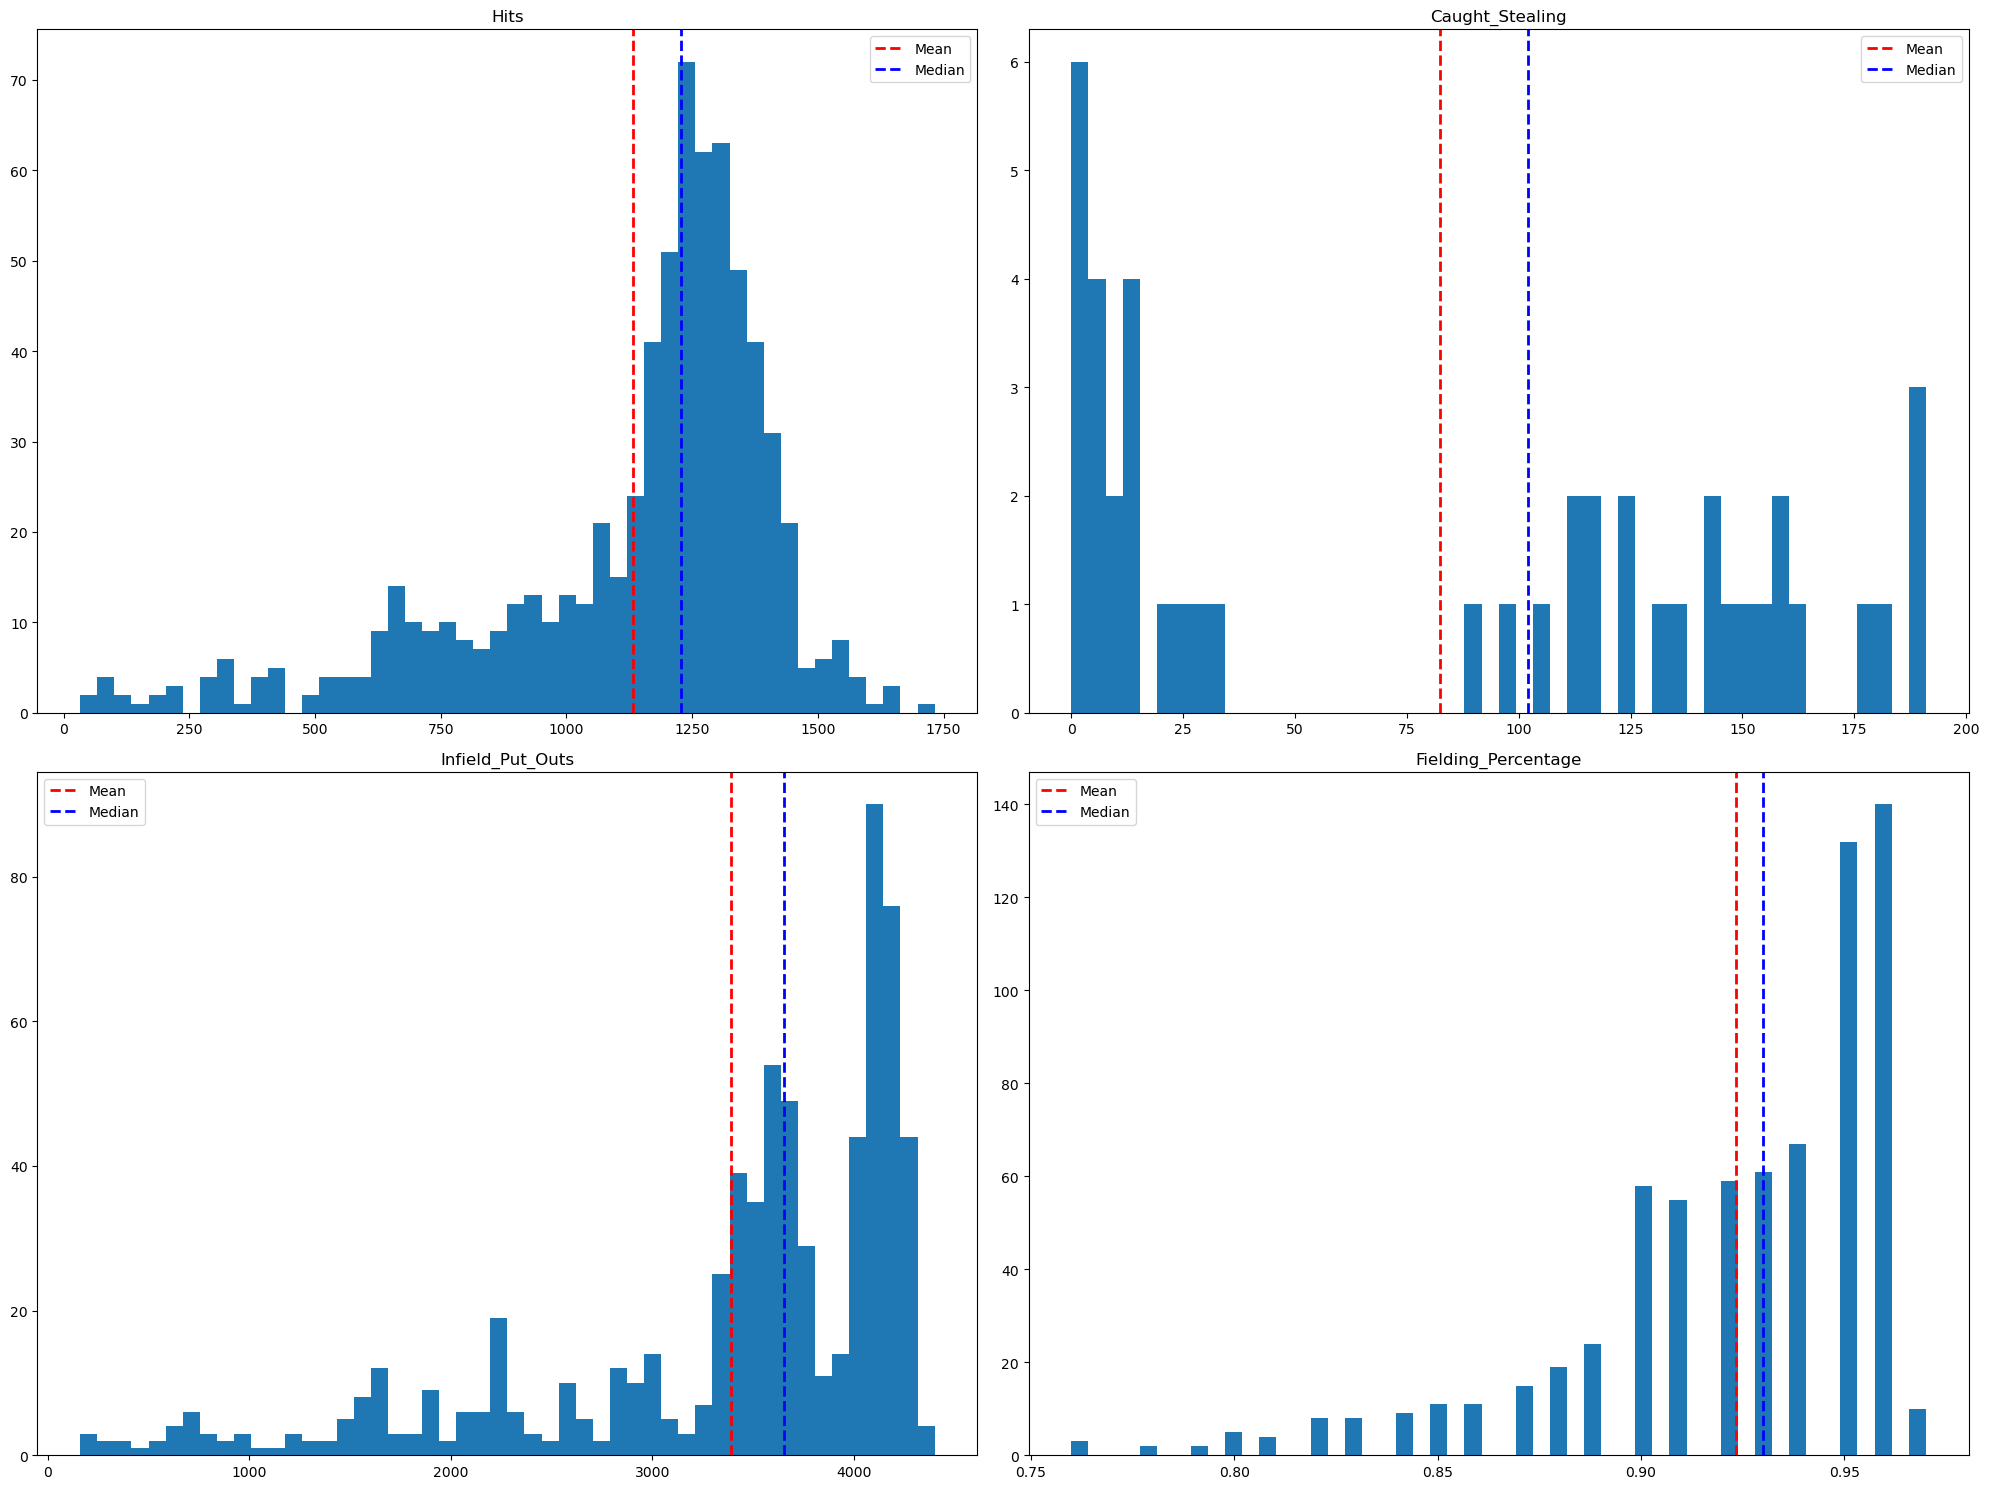

In [15]:
balance = df1[['Games_Won', 'Hits', 'Caught_Stealing', 'Infield_Put_Outs', 'Fielding_Percentage']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), balance.columns[1:]):
    ax.hist(balance[column], bins=50)
    ax.axvline(balance[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(balance[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [16]:
# Linear Regression Model for Balance

balance = balance.dropna()

X = balance[['Hits', 'Caught_Stealing', 'Infield_Put_Outs', 'Fielding_Percentage']]
y = balance['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                       Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.968   
Dependent Variable:     Games_Won        AIC:                         337.4371
Date:                   2023-06-30 09:27 BIC:                         344.5738
No. Observations:       44               Log-Likelihood:              -164.72 
Df Model:               4                F-statistic:                 331.2   
Df Residuals:           40               Prob (F-statistic):          4.48e-30
R-squared (uncentered): 0.971            Scale:                       114.97  
--------------------------------------------------------------------------------
                       Coef.     Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------------------
Hits                    0.0579     0.0159    3.6429   0.0008     0.0258   0.0900
Caught_Stealing         0.0900     0.0726    1.2395   0.2224    -0.0

Hits is the only independent variable in this model that is **statistically significant**. Caught Stealing, Infield Put Outs, and Fielding Percentage are **statistically insignificant**. However, the R^2 statistic is very high at 0.971.

## 2.2) Period 2: 1920 to 1960

In [17]:
df2 = df[(df['Year '] >= 1920) & (df['Year '] <= 1960)]
df2.head()

,Year,Final_Standing,Games_Played,Games_Won,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
703,1920,5,154,72,650,5199,1397,216,71,22,...,11,6,4185,1481,39,461,481,183,131.0,0.97
704,1920,1,155,93,660,5399,1493,205,99,28,...,17,10,4281,1381,25,327,553,226,118.0,0.96
705,1920,7,153,62,523,5218,1358,168,86,23,...,14,6,4158,1464,39,415,368,239,125.0,0.96
706,1920,2,154,96,794,5328,1574,263,98,37,...,9,10,4158,1467,45,405,438,194,142.0,0.96
707,1920,5,154,75,619,5117,1350,223,67,34,...,13,9,4164,1459,37,382,508,225,112.0,0.96


In [18]:
# Covariance Values
Covariance = df2.corr()
rank = Covariance['Games_Won']
rank = rank.sort_values(ascending=False)
print(rank)

Games_Won              1.000000
Runs_Scored            0.630446
Shutout                0.533875
Hits                   0.406878
Infield_Put_Outs       0.398372
Saves                  0.397917
Walks                  0.355075
Home_Runs              0.337838
Fielding_Percentage    0.322760
Strikeouts_Allowed     0.315247
Doubles                0.258201
Triples                0.249142
At_Bats                0.238560
Stolen_Bases           0.166497
Games_Played           0.124491
Double_Plays           0.065158
Caught_Stealing        0.019065
Year                   0.010692
Strike_Outs           -0.059774
Home_Run_Allowed      -0.119464
Walks_Allowed         -0.243707
Errors                -0.342777
Hits_Allowed          -0.494073
Earned_Runs           -0.611269
Earned_Run_Average    -0.624095
Runs_Against          -0.632867
Final_Standing        -0.943757
Name: Games_Won, dtype: float64


According to the covariance values for Period 2, we have selected the following variables for our models:

| **Offensive Metrics** | **Defensive Metrics** | **Balanced Strategy** |
|:---|:---|:---|
| Runs Scored | Shutout | Runs Scored |
| Hits | Infield Put Outs | Hits |
| Walks | Saves | Shutout |
| Home Runs | Fielding Percentage | Infield Put Outs | 

### Offensive Model 

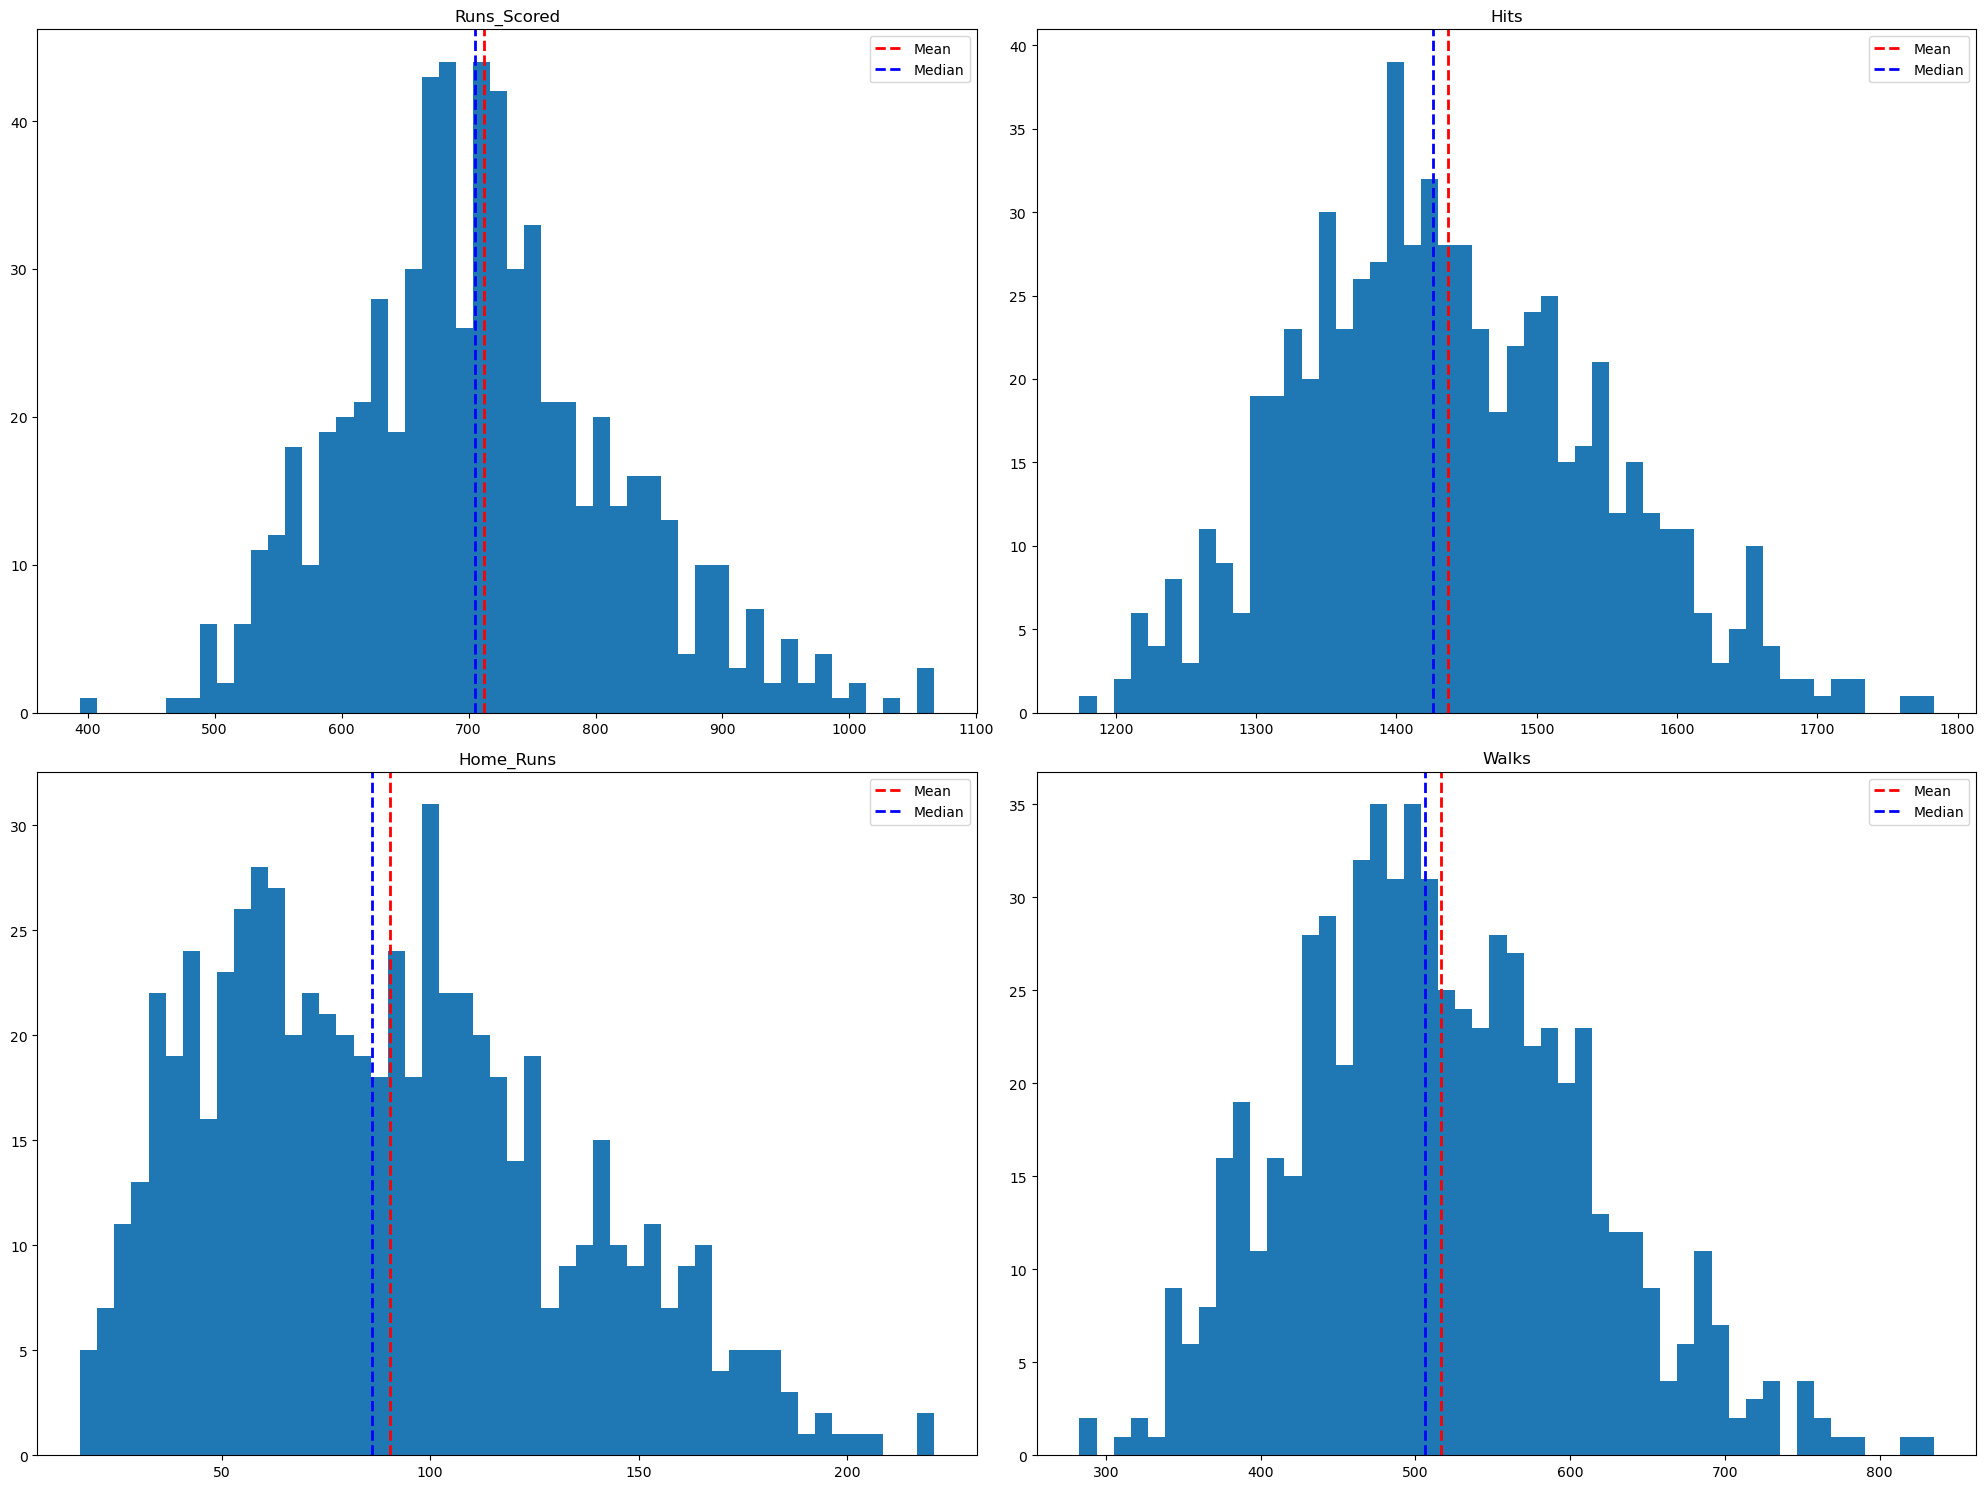

In [19]:
Off = df2[['Games_Won', 'Runs_Scored','Hits', 'Home_Runs', 'Walks']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), Off.columns[1:]):
    ax.hist(Off[column], bins=50)
    ax.axvline(Off[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(Off[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [20]:
# Linear Regression Model for Offensive

Off = Off.dropna()

X = Off[['Runs_Scored','Hits', 'Home_Runs', 'Walks']]
y = Off['Games_Won']
X1 = sm.add_constant(X)
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.423    
Dependent Variable: Games_Won        AIC:                4994.8268
Date:               2023-06-30 09:27 BIC:                5017.2576
No. Observations:   656              Log-Likelihood:     -2492.4  
Df Model:           4                F-statistic:        121.2    
Df Residuals:       651              Prob (F-statistic): 2.90e-77 
R-squared:          0.427            Scale:              117.75   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const          57.9418   11.5978   4.9959  0.0000  35.1683  80.7154
Runs_Scored     0.1254    0.0135   9.2586  0.0000   0.0988   0.1520
Hits           -0.0456    0.0116  -3.9121  0.0001  -0.0684  -0.0227
Home_Runs       0.0020    0.0140   0.1422  0.8870  -0.0255   0.0294
Walks 

Runs Scored, Hits and Walks are **statistically significant** while Home Runs is **statistically insignificant**. However, The R^2 statistic is 0.427. In addition, the sign on independent variables Hits and Walks is negative, which suggests that between 1920 and 1960 offensive strategies might not have been doing well.

### Defensive Model

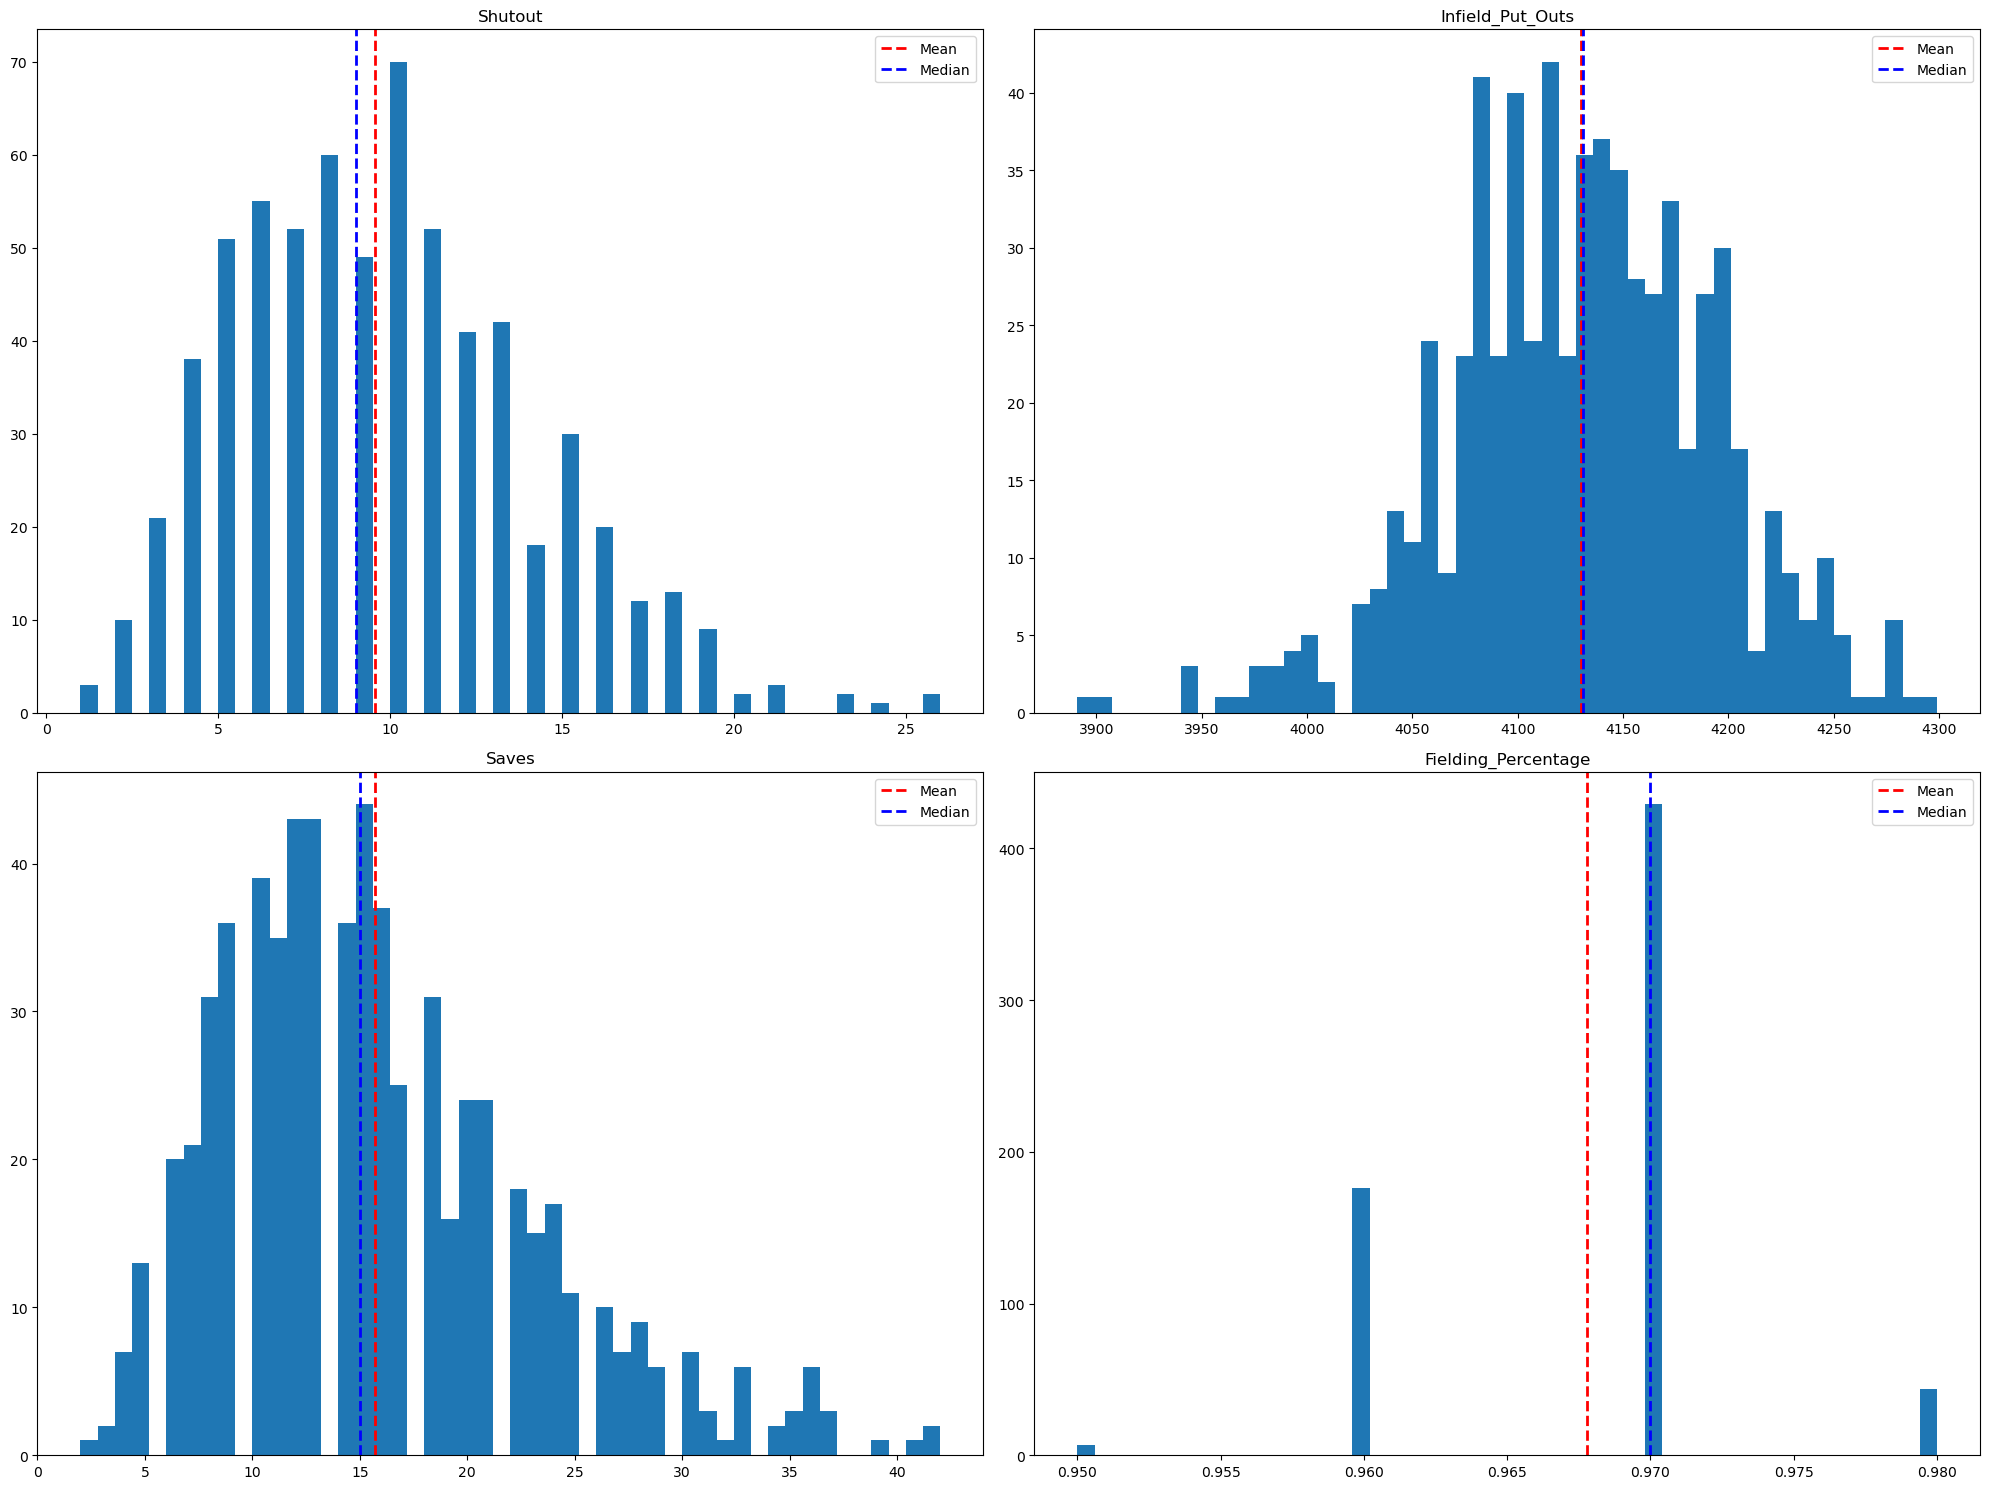

In [21]:
defensive = df2[['Games_Won', 'Shutout', 'Infield_Put_Outs', 'Saves', 'Fielding_Percentage']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), defensive.columns[1:]):
    ax.hist(defensive[column], bins=50)
    ax.axvline(defensive[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(defensive[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [22]:
# Linear Regression Model for Defensive

defensive = defensive.dropna()

X = defensive[['Shutout', 'Infield_Put_Outs', 'Saves', 'Fielding_Percentage']]
y = defensive['Games_Won']
X1 = sm.add_constant(X)
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                    Results: Ordinary least squares
Model:                OLS                Adj. R-squared:       0.395    
Dependent Variable:   Games_Won          AIC:                  5025.8170
Date:                 2023-06-30 09:27   BIC:                  5048.2478
No. Observations:     656                Log-Likelihood:       -2507.9  
Df Model:             4                  F-statistic:          108.1    
Df Residuals:         651                Prob (F-statistic):   1.29e-70 
R-squared:            0.399              Scale:                123.45   
------------------------------------------------------------------------
                      Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
------------------------------------------------------------------------
const               -203.7668  86.0182 -2.3689 0.0181 -372.6733 -34.8602
Shutout                1.3063   0.1132 11.5369 0.0000    1.0840   1.5287
Infield_Put_Outs       0.0444   0.0076  5.8662 0.0000    0.0296   0.0593

All variables are **statistically significant**, and the R^2 statistic is 0.669. However, there might be some multicollinearity in the variables selected using the highest covariance criteria. 

### Balanced Strategy Model

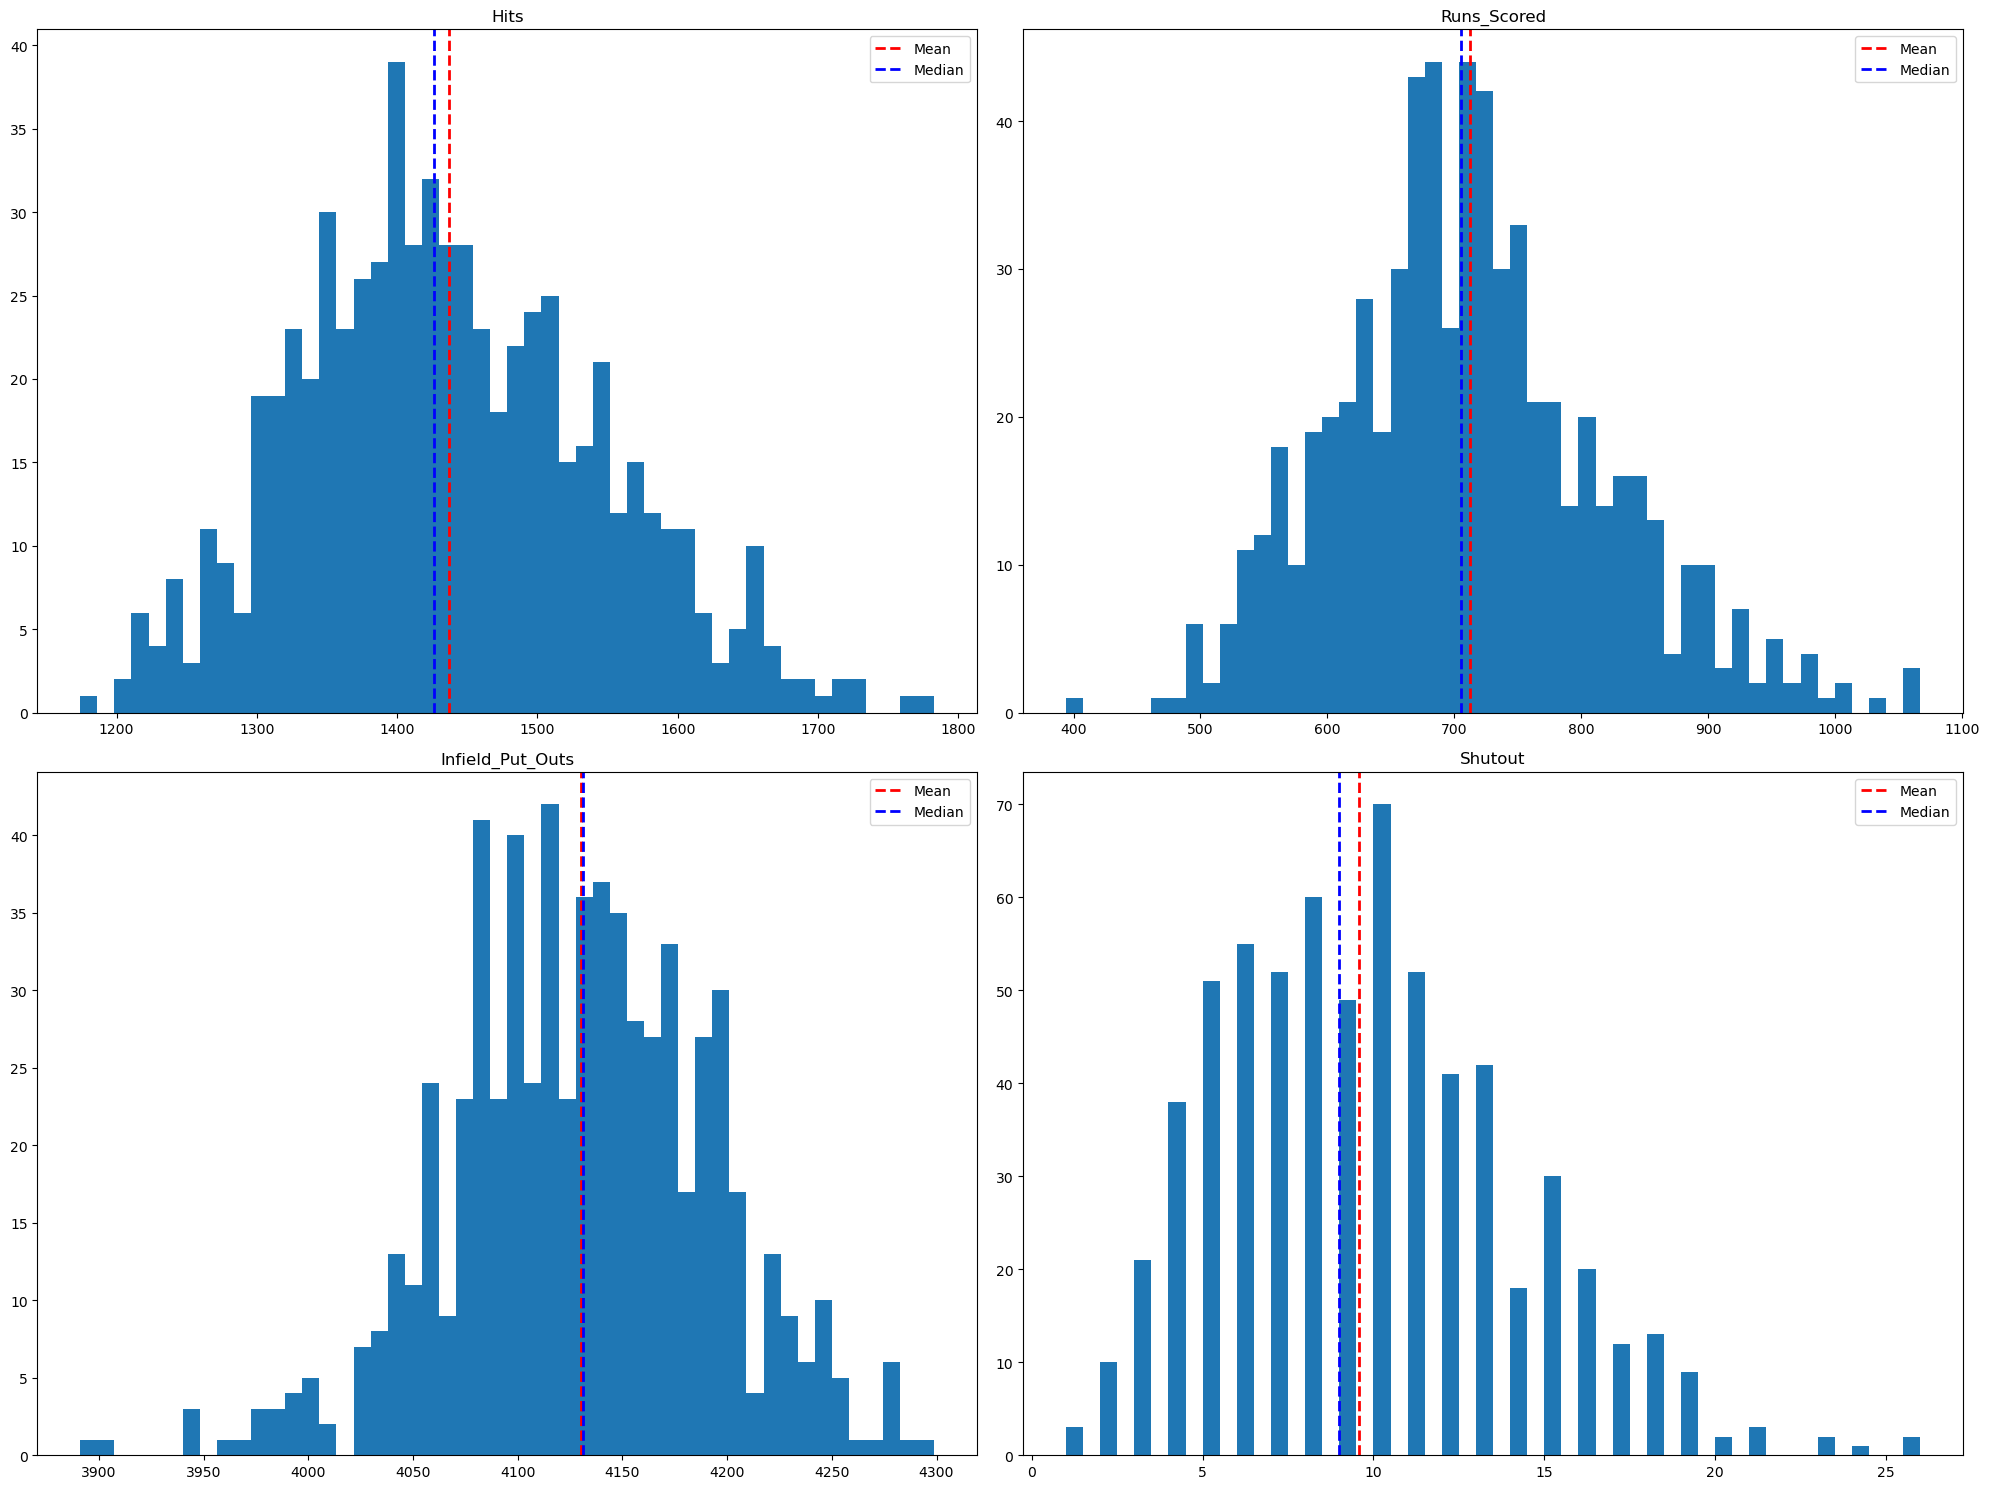

In [23]:
balance = df2[['Games_Won', 'Hits', 'Runs_Scored', 'Infield_Put_Outs', 'Shutout']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), balance.columns[1:]):
    ax.hist(balance[column], bins=50)
    ax.axvline(balance[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(balance[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [24]:
# Linear Regression Model for Balance

balance = balance.dropna()

X = balance[['Hits', 'Runs_Scored', 'Infield_Put_Outs', 'Shutout']]
y = balance['Games_Won']
X1 = sm.add_constant(X)
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                   Results: Ordinary least squares
Model:                OLS               Adj. R-squared:      0.731    
Dependent Variable:   Games_Won         AIC:                 4495.1608
Date:                 2023-06-30 09:27  BIC:                 4517.5916
No. Observations:     656               Log-Likelihood:      -2242.6  
Df Model:             4                 F-statistic:         445.5    
Df Residuals:         651               Prob (F-statistic):  1.05e-184
R-squared:            0.732             Scale:               54.977   
----------------------------------------------------------------------
                   Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
----------------------------------------------------------------------
const            -182.9240  20.4990 -8.9235 0.0000 -223.1762 -142.6718
Hits               -0.0187   0.0046 -4.0664 0.0001   -0.0277   -0.0097
Runs_Scored         0.0993   0.0046 21.5305 0.0000    0.0903    0.1084
Infield_Put_Outs    0.0488

All variables in this model are **statistically significant** and the R^2 statistic is 0.732.

## 2.3) Period 3: 1960 to 1990

In [25]:
df3 = df[(df['Year '] >= 1960) & (df['Year '] <= 1990)]
df3.head()

,Year,Final_Standing,Games_Played,Games_Won,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
1343,1960,2,154,89,682,5170,1307,206,33,123,...,11,22,4125,1222,117,552,785,107,172.0,0.98
1344,1960,7,154,65,658,5215,1359,234,32,124,...,6,23,4083,1440,127,580,767,140,156.0,0.97
1345,1960,3,154,87,741,5191,1402,242,38,112,...,11,26,4143,1338,127,533,695,109,175.0,0.98
1346,1960,7,156,60,634,5311,1293,213,48,119,...,6,25,4206,1393,152,565,805,143,133.0,0.97
1347,1960,6,154,67,640,5289,1324,230,40,140,...,8,35,4170,1417,134,442,740,125,155.0,0.97


In [26]:
# Covariance Values
Covariance = df3.corr()
rank = Covariance['Games_Won']
rank = rank.sort_values(ascending=False)
print(rank)

Games_Won              1.000000
Runs_Scored            0.672123
Hits                   0.573141
Saves                  0.502047
Infield_Put_Outs       0.464001
At_Bats                0.455421
Shutout                0.451290
Home_Runs              0.429573
Games_Played           0.412684
Doubles                0.407826
Walks                  0.397121
Strikeouts_Allowed     0.347724
Fielding_Percentage    0.250331
Triples                0.226863
Stolen_Bases           0.196922
Double_Plays           0.158119
Strike_Outs            0.134474
Caught_Stealing        0.038369
Hits_Allowed           0.032424
Home_Run_Allowed      -0.011753
Year                  -0.022225
Errors                -0.148223
Walks_Allowed         -0.164312
Earned_Runs           -0.227279
Runs_Against          -0.249366
Earned_Run_Average    -0.476491
Final_Standing        -0.759686
Name: Games_Won, dtype: float64


According to the covariance values for Period 3, we have selected the following variables for our models:

| **Offensive Metrics** | **Defensive Metrics** | **Balanced Strategy** |
|:---|:---|:---|
| Runs Scored | Saves | Runs Scored |
| Hits | Infield Put Outs | Hits |
| At Bats | Shutout | Saves |
| Home Runs | Strikeouts Allowed | Infield Put Outs | 

### Offensive Model

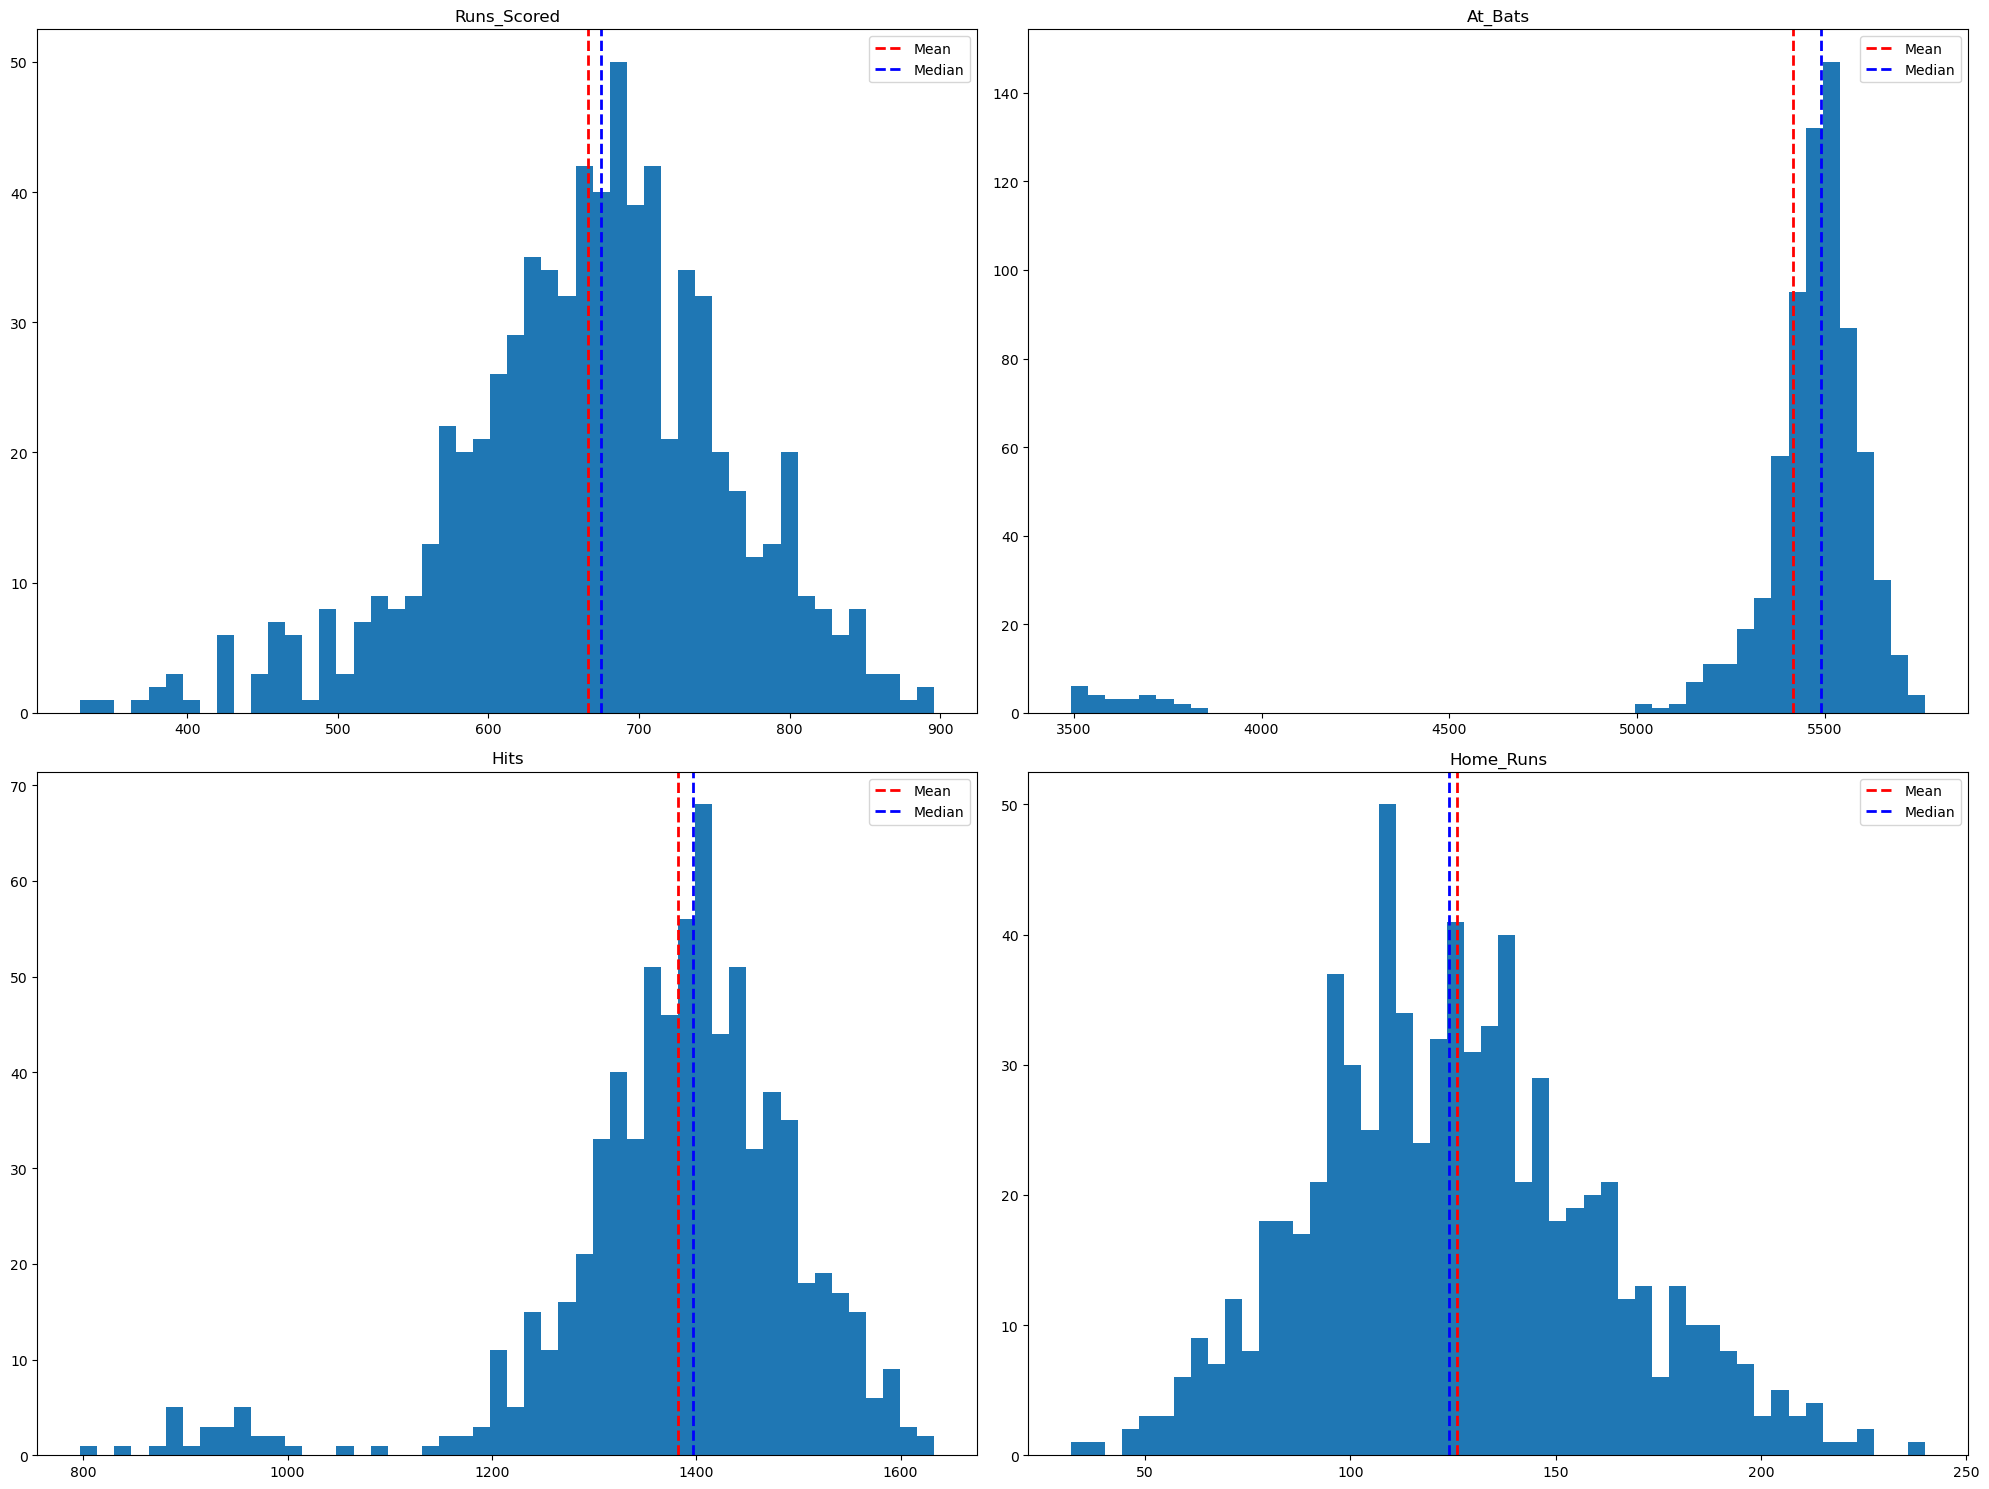

In [27]:
Off = df3[['Games_Won','Runs_Scored', 'At_Bats','Hits', 'Home_Runs']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), Off.columns[1:]):
    ax.hist(Off[column], bins=50)
    ax.axvline(Off[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(Off[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [28]:
# Linear Regression Model for Offensive

Off = Off.dropna()

X = Off[['Runs_Scored', 'At_Bats','Hits', 'Home_Runs']]
y = Off['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.987    
Dependent Variable:     Games_Won        AIC:                         5326.5893
Date:                   2023-06-30 09:27 BIC:                         5344.9614
No. Observations:       730              Log-Likelihood:              -2659.3  
Df Model:               4                F-statistic:                 1.363e+04
Df Residuals:           726              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.987            Scale:                       85.915   
-----------------------------------------------------------------------------------
                 Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Runs_Scored      0.1192       0.0105     11.3918     0.0000      0.0986      0.1397
At_Bats          0.0080       0.0015      5.3967

All of the variables in this model are **statiscally significant** and the R^2 value of 0.987 is very high, which suggests that offensive strategies were doing really well in terms of winning games.

### Defensive Model

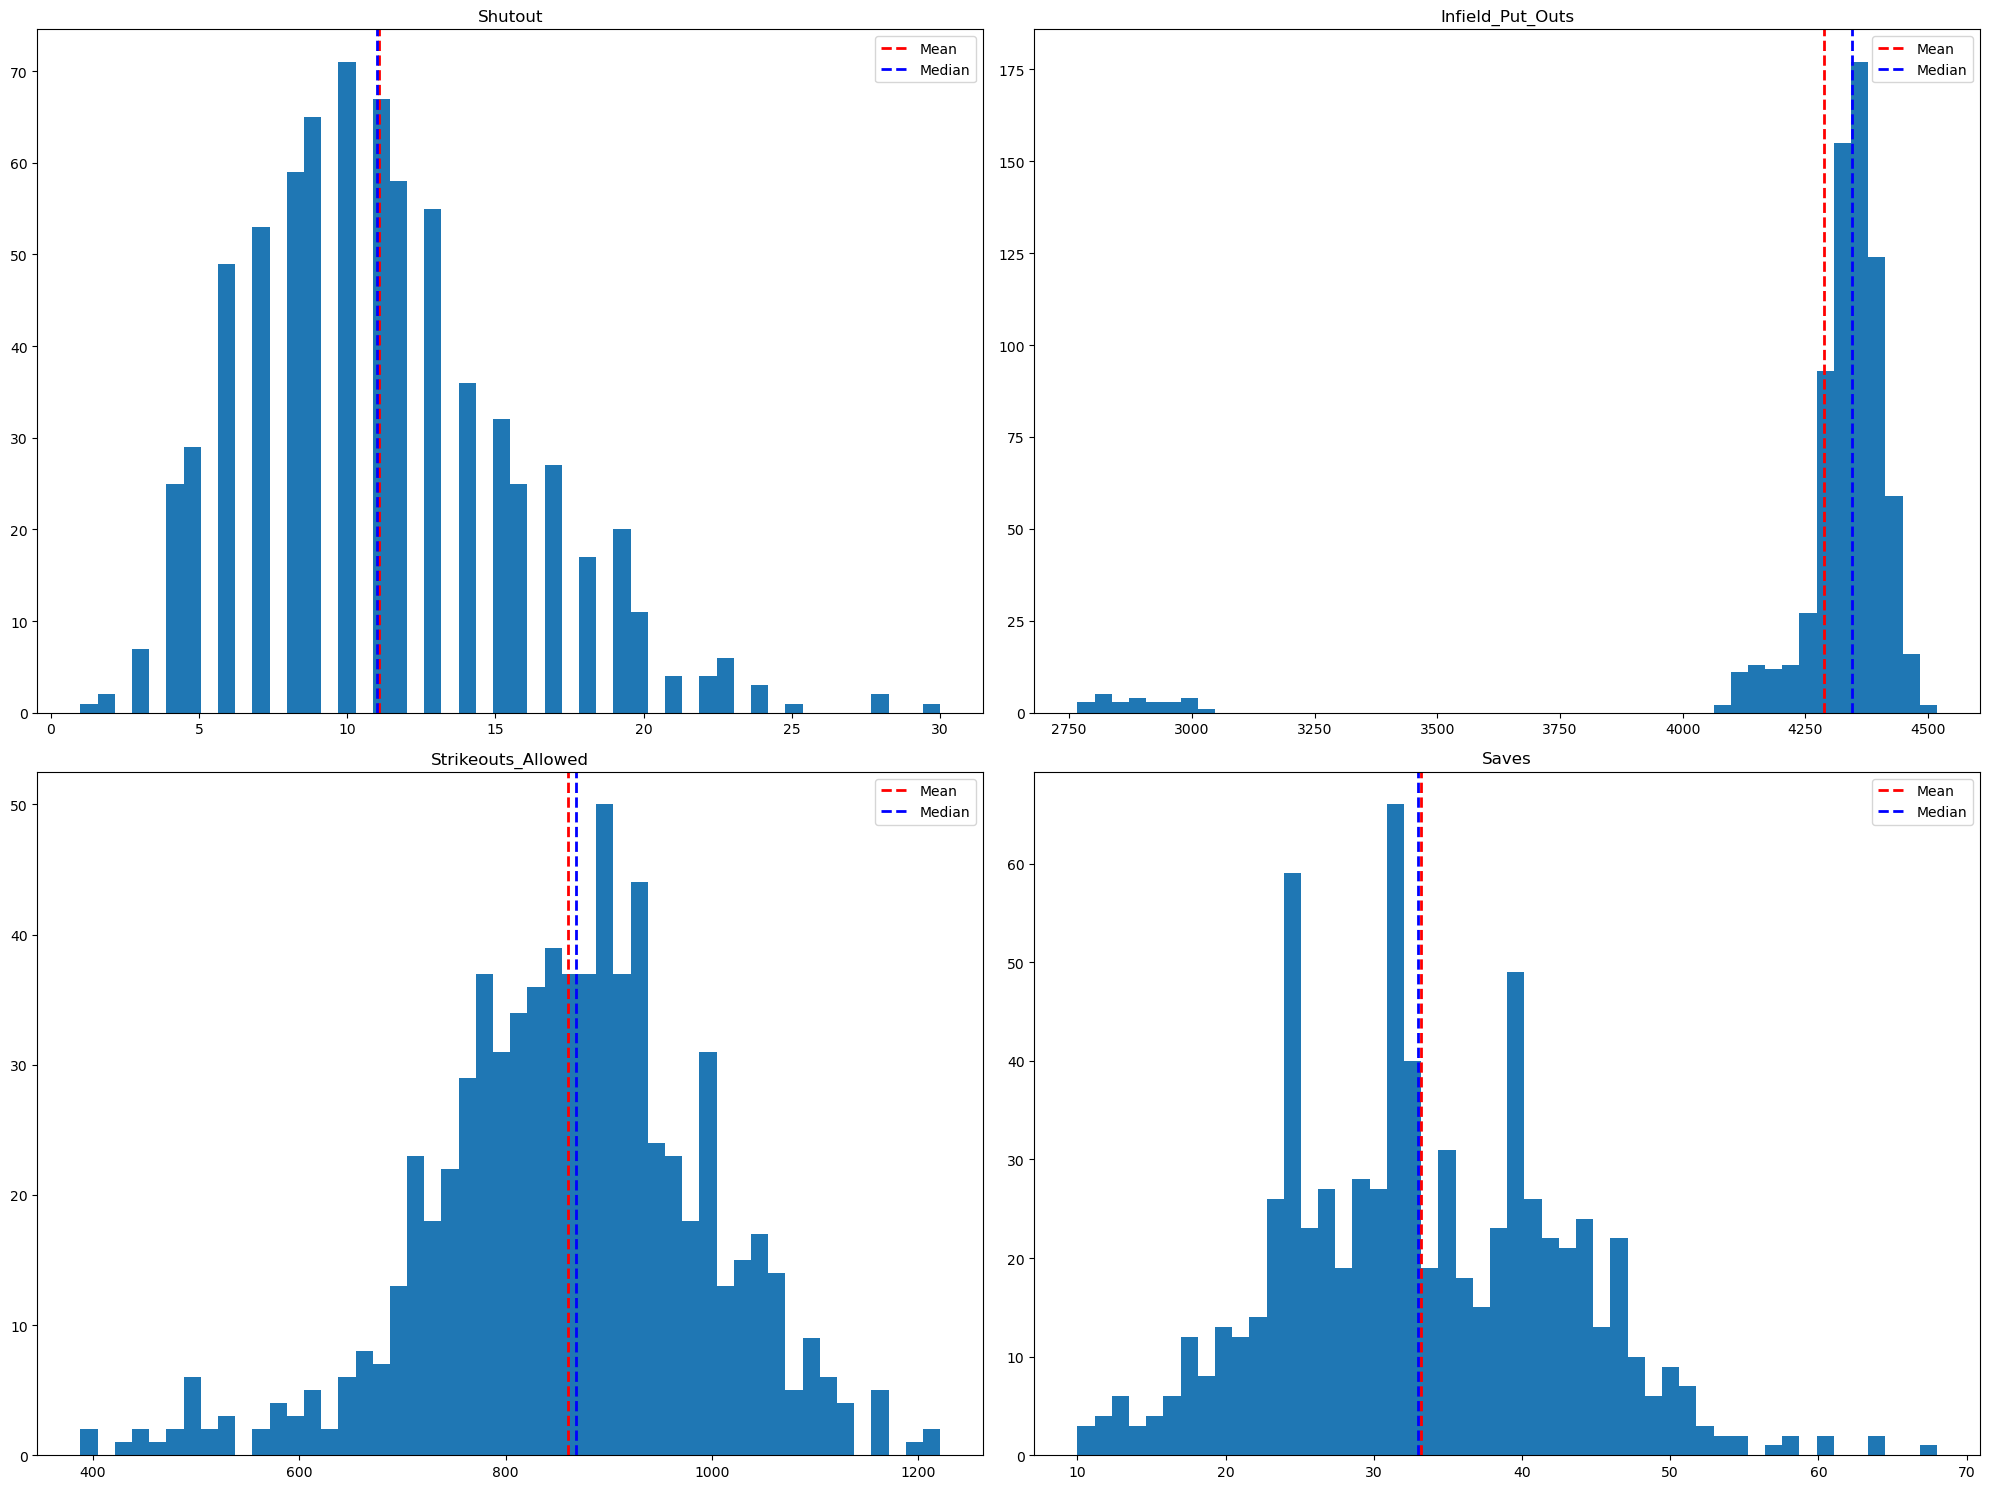

In [29]:
defensive = df3[['Games_Won', 'Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), defensive.columns[1:]):
    ax.hist(defensive[column], bins=50)
    ax.axvline(defensive[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(defensive[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [30]:
# Linear Regression Model for Defensive

defensive = defensive.dropna()

X = defensive[['Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves']]
y = defensive['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.988    
Dependent Variable:     Games_Won        AIC:                         5239.8374
Date:                   2023-06-30 09:27 BIC:                         5258.2095
No. Observations:       730              Log-Likelihood:              -2615.9  
Df Model:               4                F-statistic:                 1.537e+04
Df Residuals:           726              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.988            Scale:                       76.288   
---------------------------------------------------------------------------------
                          Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
---------------------------------------------------------------------------------
Shutout                   1.0902     0.0741   14.7086   0.0000    0.9446   1.2357
Infield_Put_Outs          0.0116     0.0006   18.5343   

Shutout, Infield Put Outs and Saves are **statistically significant** while Strikeouts Allowed is **statistically insignifcant**. As well, the R^2 statistic is very high at 0.988. 

### Balanced Strategy Model

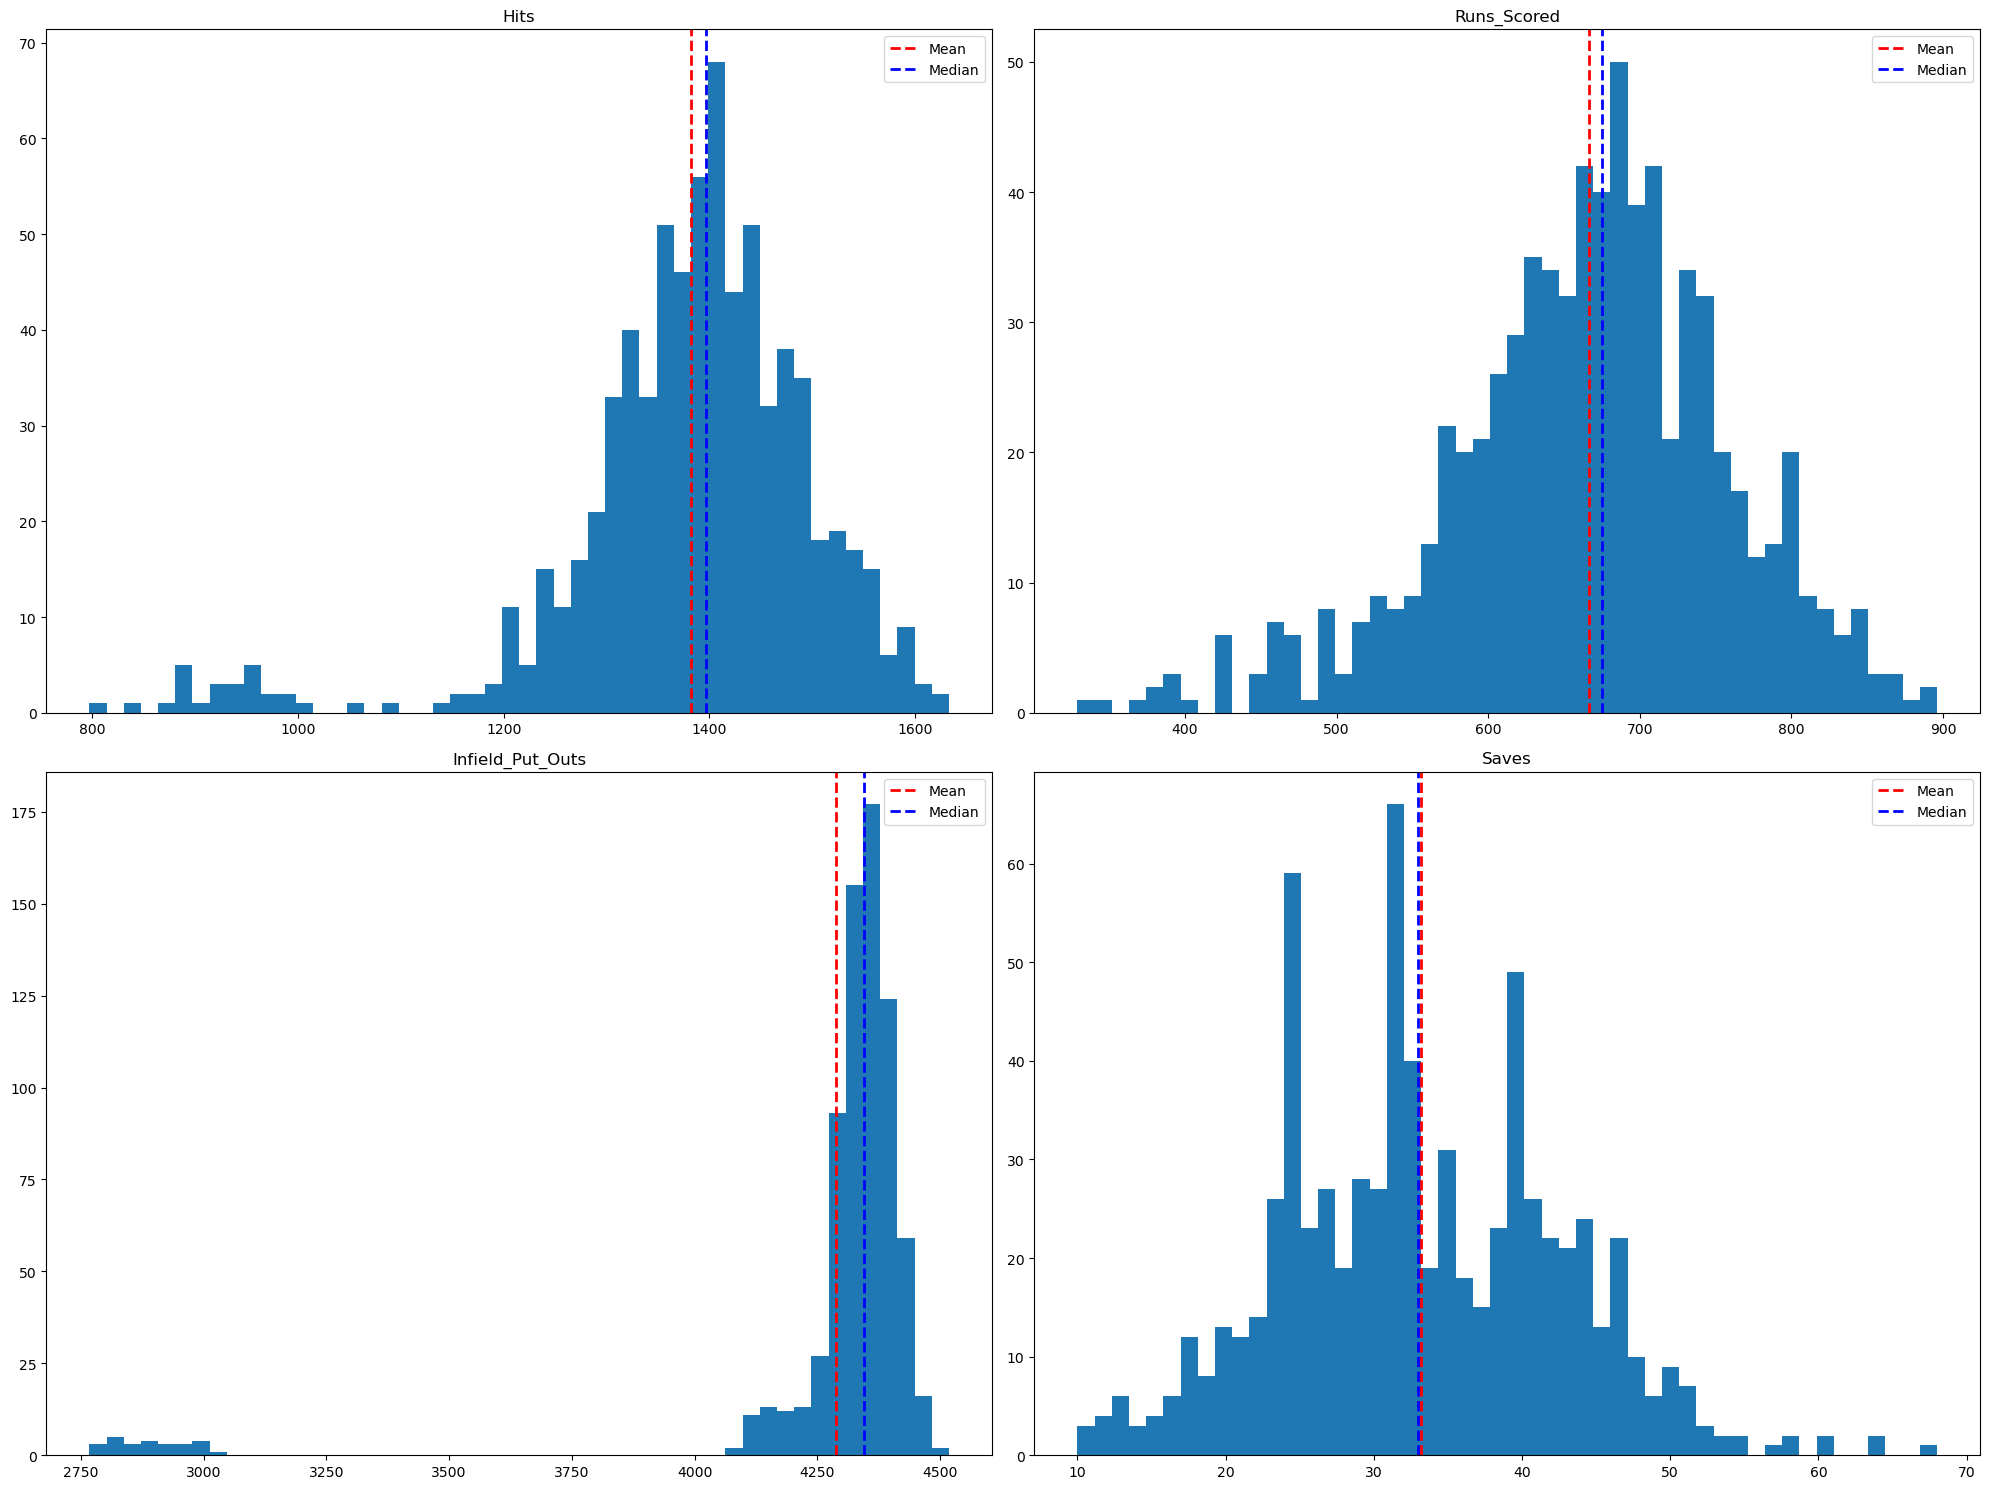

In [31]:
balance = df3[['Games_Won', 'Hits', 'Runs_Scored', 'Infield_Put_Outs', 'Saves']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), balance.columns[1:]):
    ax.hist(balance[column], bins=50)
    ax.axvline(balance[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(balance[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [32]:
# Linear Regression Model for Balance

balance = balance.dropna()

X = balance[['Hits', 'Runs_Scored', 'Infield_Put_Outs', 'Saves']]
y = balance['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.989    
Dependent Variable:     Games_Won        AIC:                         5203.0643
Date:                   2023-06-30 09:27 BIC:                         5221.4364
No. Observations:       730              Log-Likelihood:              -2597.5  
Df Model:               4                F-statistic:                 1.617e+04
Df Residuals:           726              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.989            Scale:                       72.540   
----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
Hits                -0.0215      0.0061    -3.5116    0.0005    -0.0335    -0.0095
Runs_Scored          0.0863      0.0068    12.6741  

All the variables in this model are **statistically significant** and the R^2 statistic is very high at 0.989, suggesting the balance strategy might have been very effective at that time period.

## 2.4) Period 4: 1990 to 2010

In [33]:
df4 = df[(df['Year '] >= 1990) & (df['Year '] <= 2010)]
df4.tail()

,Year,Final_Standing,Games_Played,Games_Won,Runs_Scored,At_Bats,Hits,Doubles,Triples,Home_Runs,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
2650,2010,2,162,86,736,5542,1456,285,18,150,...,16,32,4361,1412,133,477,1094,99,172.0,0.984
2651,2010,1,162,96,802,5439,1343,295,37,160,...,12,51,4361,1347,175,478,1189,85,134.0,0.986
2652,2010,1,162,90,787,5635,1556,268,25,162,...,8,46,4366,1355,162,551,1181,105,133.0,0.982
2653,2010,4,162,85,755,5495,1364,319,21,257,...,11,45,4322,1407,150,539,1184,92,172.0,0.985
2654,2010,5,162,69,655,5418,1355,250,31,149,...,5,37,4305,1469,151,512,1068,127,148.0,0.979


In [34]:
# Covariance Values
Covariance = df4.corr()
rank = Covariance['Games_Won']
rank = rank.sort_values(ascending=False)
print(rank)

Games_Won              1.000000
Saves                  0.702968
Runs_Scored            0.627615
Hits                   0.548153
Walks                  0.536093
Shutout                0.526188
Strikeouts_Allowed     0.491782
Infield_Put_Outs       0.482071
At_Bats                0.451233
Games_Played           0.431287
Home_Runs              0.422444
Doubles                0.391859
Fielding_Percentage    0.282799
Stolen_Bases           0.159598
Strike_Outs            0.125259
Year                   0.123664
Double_Plays           0.052713
Triples                0.035709
Caught_Stealing        0.012692
Hits_Allowed          -0.005547
Home_Run_Allowed      -0.117280
Walks_Allowed         -0.151105
Errors                -0.165894
Earned_Runs           -0.274627
Runs_Against          -0.298179
Earned_Run_Average    -0.554553
Final_Standing        -0.741113
Name: Games_Won, dtype: float64


According to the covariance values for Period 4, we have selected the following variables for our models:

| **Offensive Metrics** | **Defensive Metrics** | **Balanced Strategy** |
|:---|:---|:---|
| Runs Scored | Saves | Runs Scored |
| Hits | Shutout | Hits |
| Walks | Strikeouts Allowed | Saves |
| At Bats | Infield Put Outs | Shutout | 

### Offensive Model

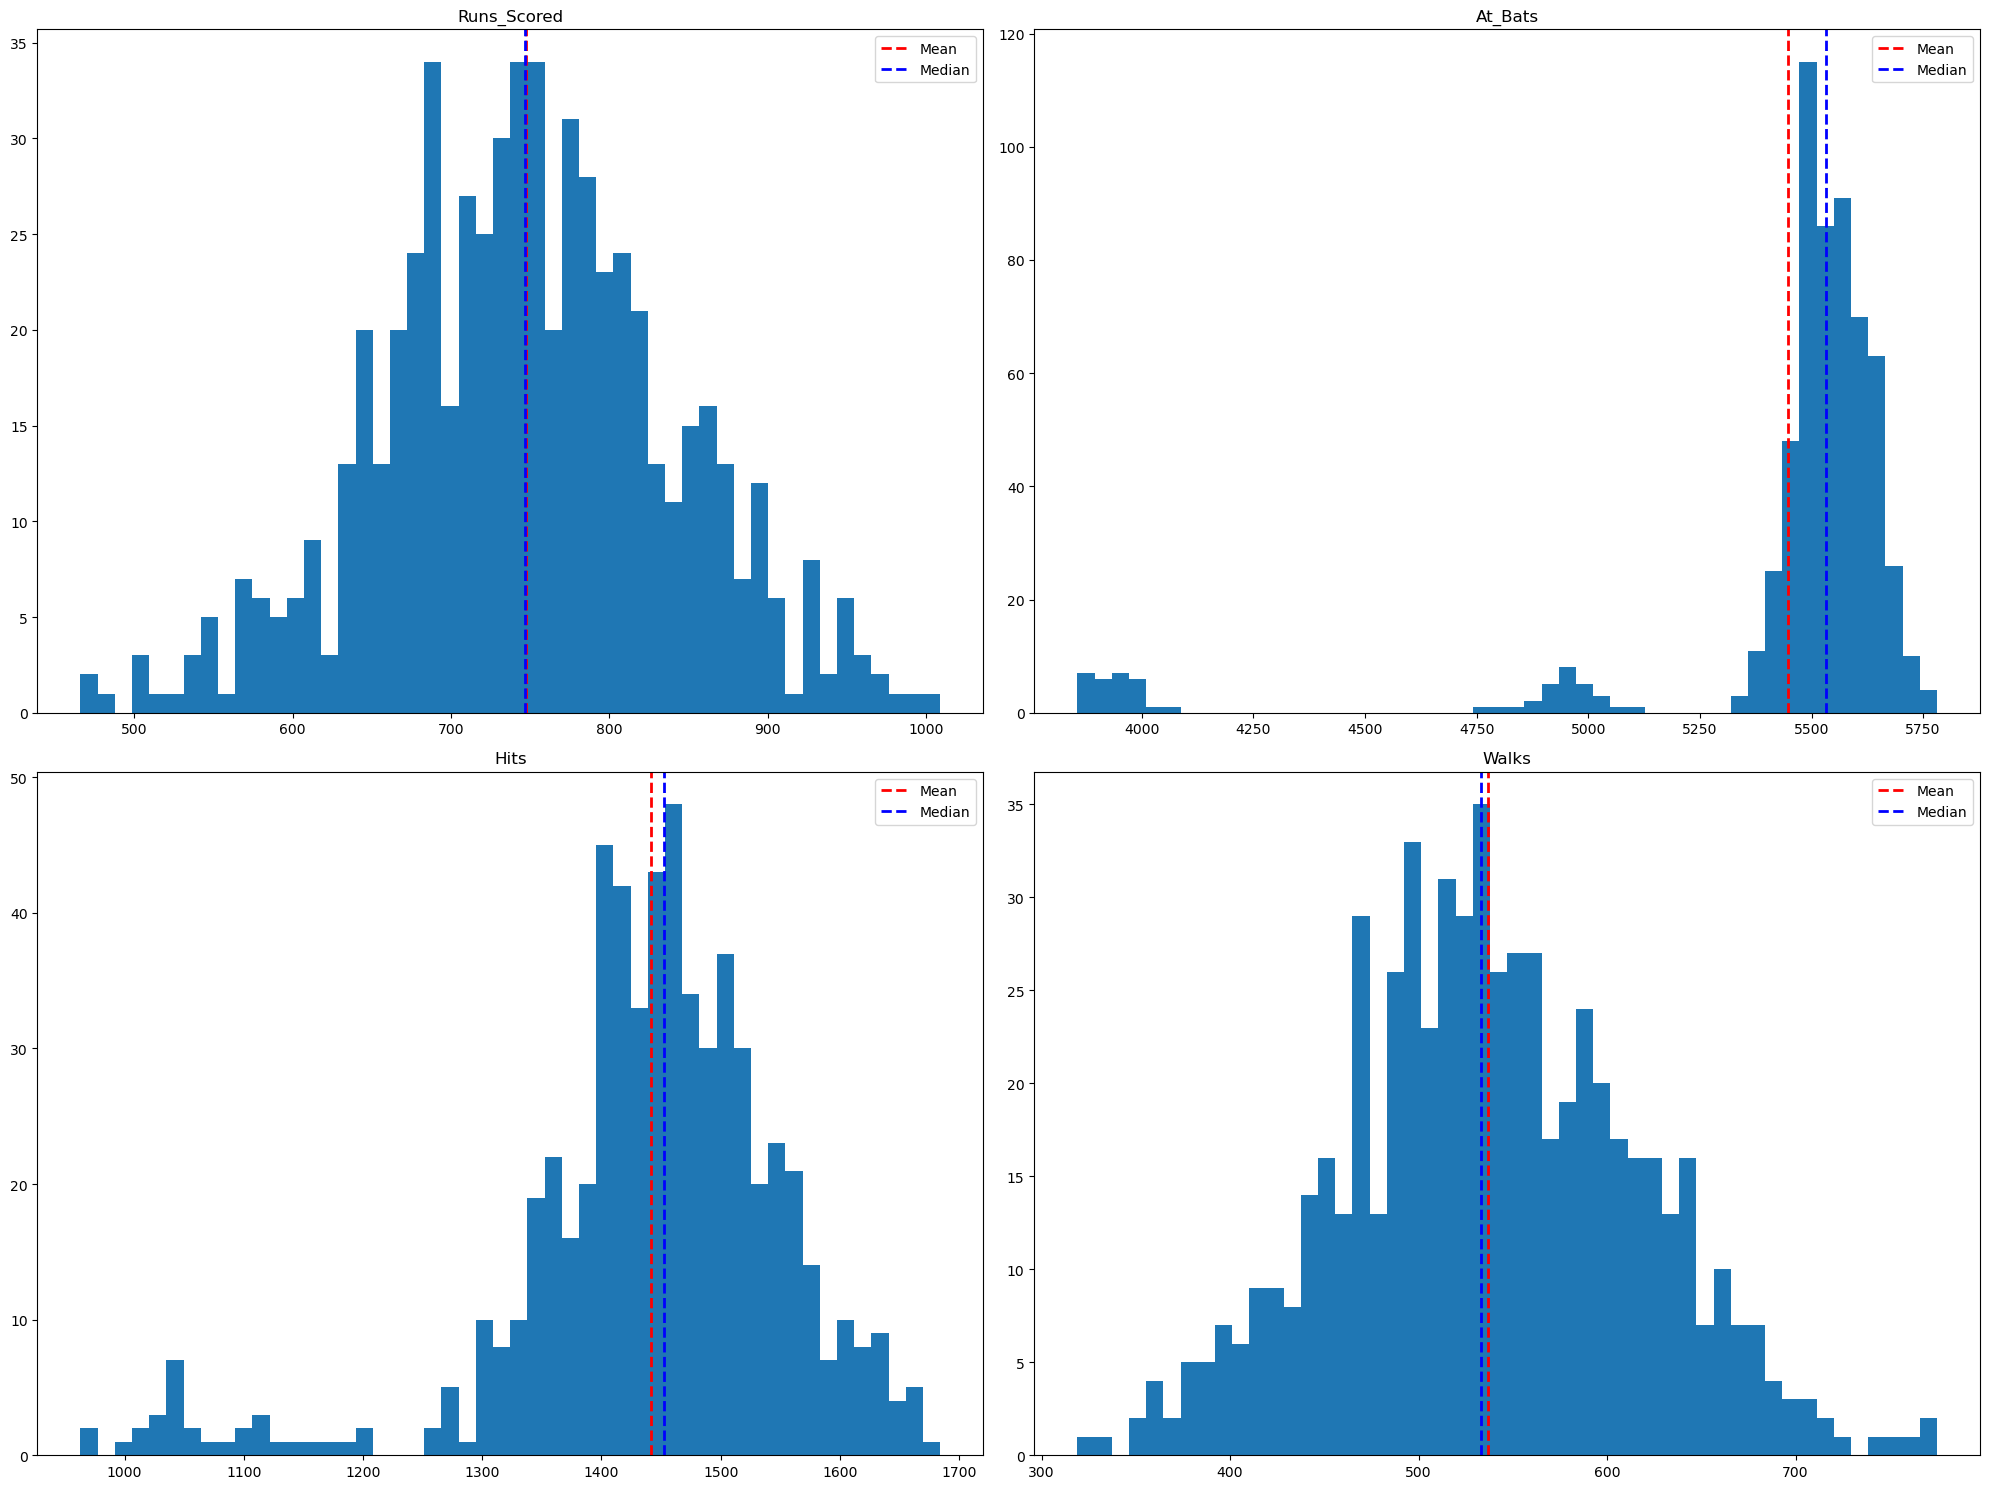

In [35]:
Off = df4[['Games_Won','Runs_Scored', 'At_Bats','Hits', 'Walks']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), Off.columns[1:]):
    ax.hist(Off[column], bins=50)
    ax.axvline(Off[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(Off[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [36]:
# Linear Regression Model for Offensive

Off = Off.dropna()

X = Off[['Runs_Scored', 'At_Bats','Hits', 'Walks']]
y = Off['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.987    
Dependent Variable:     Games_Won        AIC:                         4437.1300
Date:                   2023-06-30 09:27 BIC:                         4454.7707
No. Observations:       608              Log-Likelihood:              -2214.6  
Df Model:               4                F-statistic:                 1.128e+04
Df Residuals:           604              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.987            Scale:                       85.925   
-----------------------------------------------------------------------------------
                   Coef.      Std.Err.       t        P>|t|       [0.025     0.975]
-----------------------------------------------------------------------------------
Runs_Scored        0.0486       0.0102     4.7741     0.0000      0.0286     0.0686
At_Bats            0.0022       0.0022     0.998

Runs Scored and Walks are **statistically significant** while At Bats and Hits are **statistically insignificant**. However, the R^2 statistic is 0.987

### Defensive Model

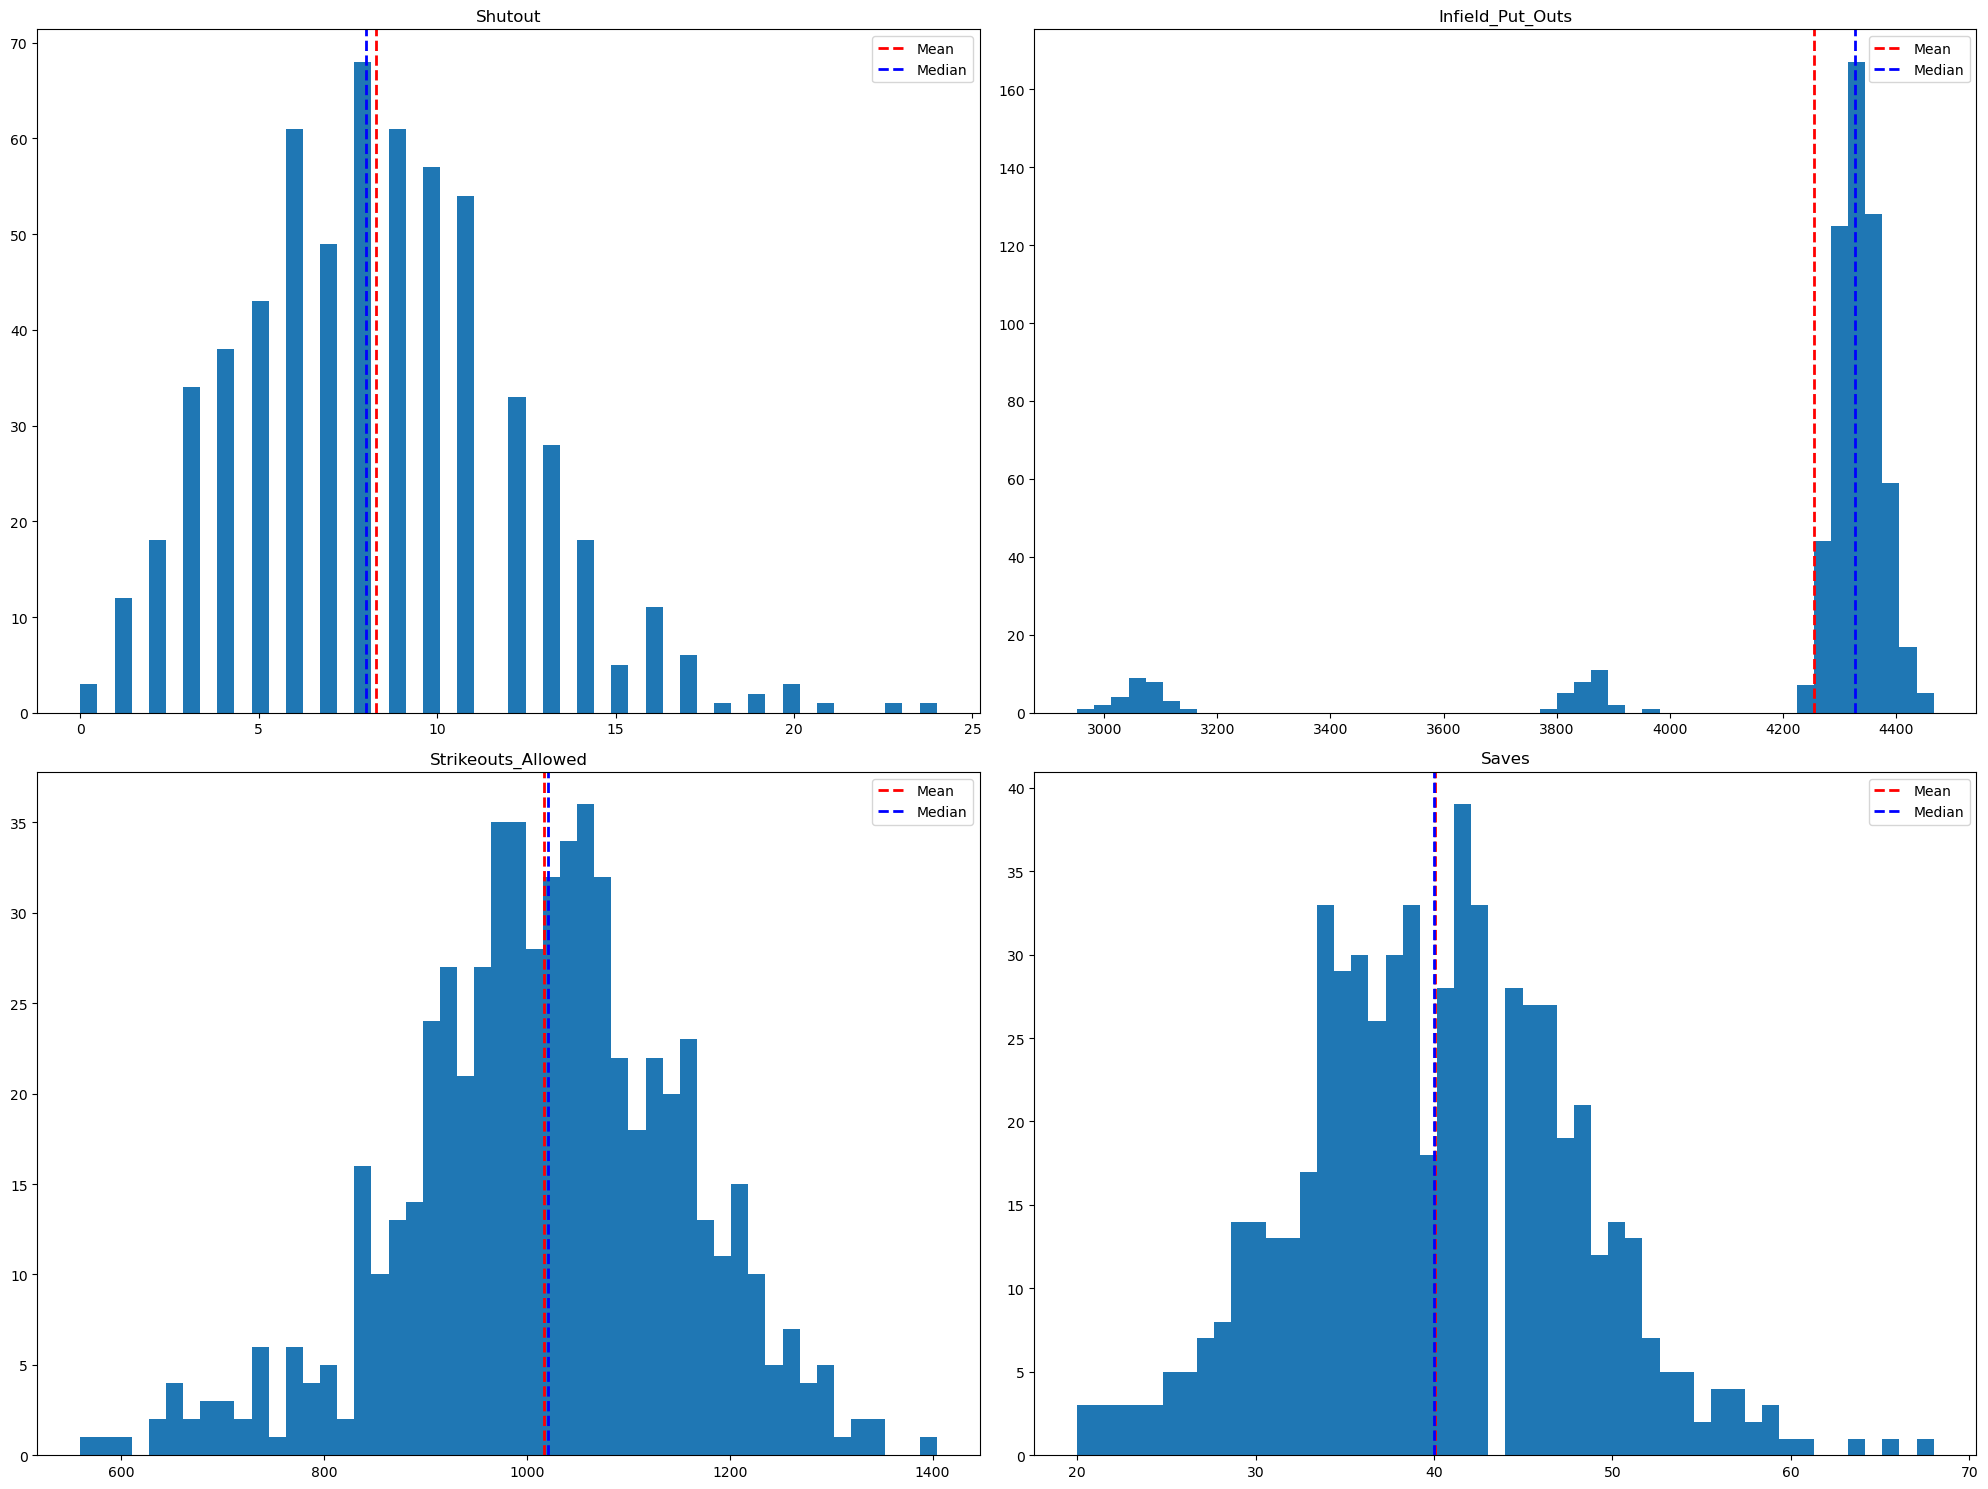

In [37]:
defensive = df4[['Games_Won', 'Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), defensive.columns[1:]):
    ax.hist(defensive[column], bins=50)
    ax.axvline(defensive[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(defensive[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [38]:
# Linear Regression Model for Defensive

defensive = defensive.dropna()

X = defensive[['Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves']]
y = defensive['Games_Won']
X1 = sm.add_constant(X)
lin_model=sm.OLS(y,X1)
result=lin_model.fit()
print(result.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.620    
Dependent Variable: Games_Won        AIC:                4191.5698
Date:               2023-06-30 09:27 BIC:                4213.6207
No. Observations:   608              Log-Likelihood:     -2090.8  
Df Model:           4                F-statistic:        248.9    
Df Residuals:       603              Prob (F-statistic): 3.99e-126
R-squared:          0.623            Scale:              57.281   
------------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
------------------------------------------------------------------
const               9.3708   4.7614  1.9681 0.0495  0.0199 18.7217
Shutout             0.7199   0.0908  7.9314 0.0000  0.5416  0.8981
Infield_Put_Outs    0.0027   0.0014  1.9538 0.0512 -0.0000  0.0055
Strikeouts_Allowed  0.0188   0.0028  6.6650 0.0000  0.0133  0.0244
Saves        

At a 5% level, Shutout, Strikeouts Allowed and Saves are **statistically significant** and Infield Put Outs is **statistically insignificant**. The R^2 statistic is 0.623.

### Balanced Strategy Model

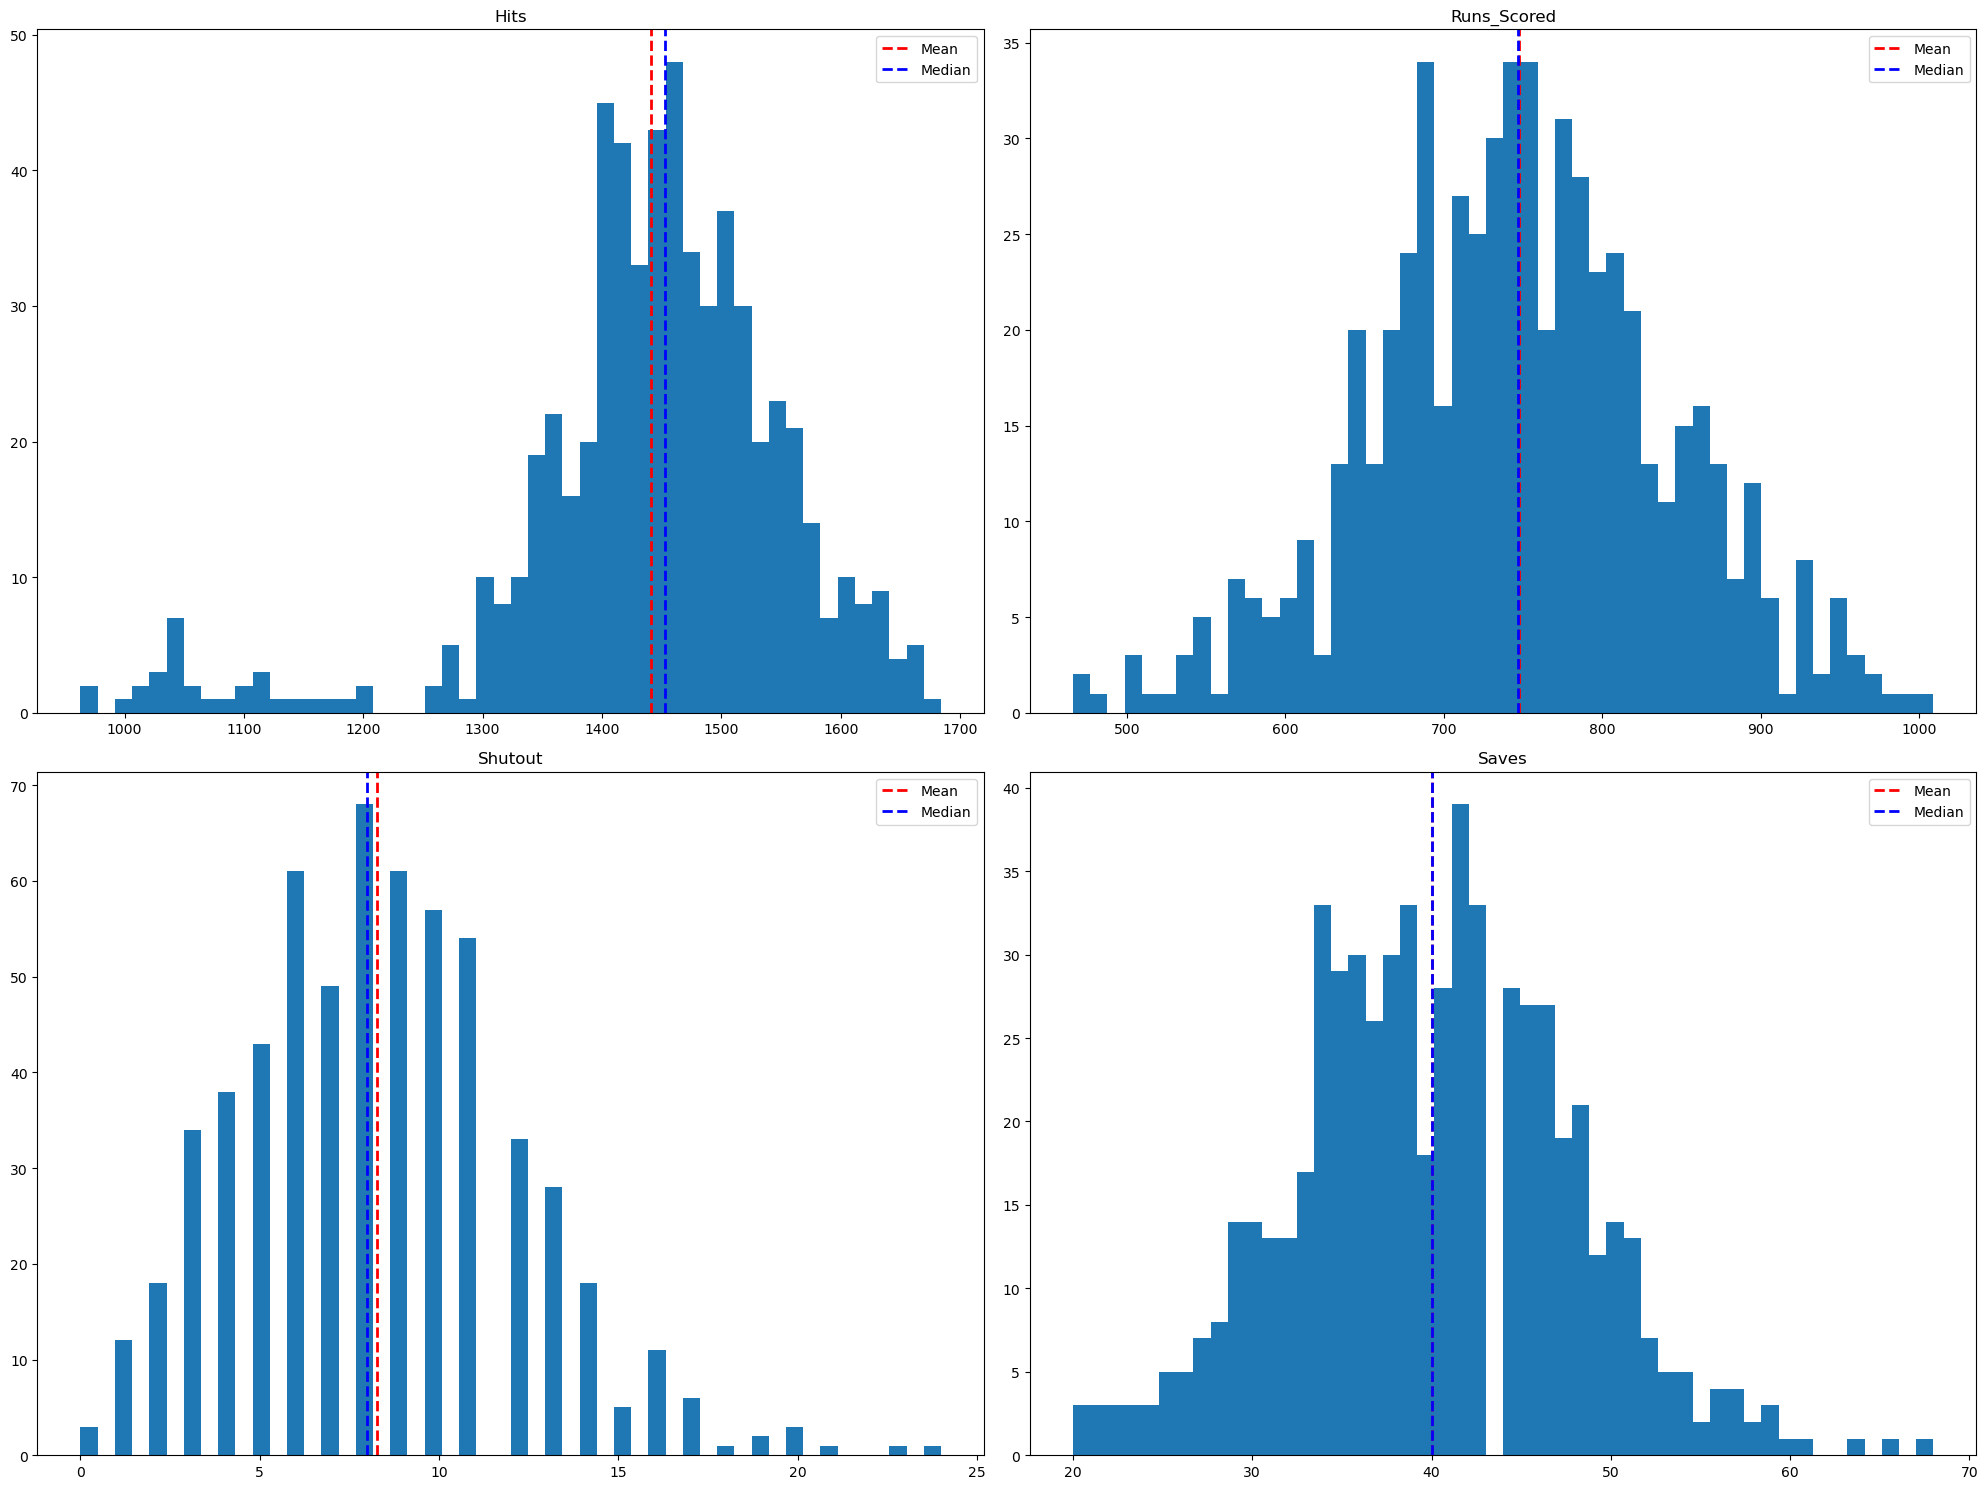

In [39]:
balance = df4[['Games_Won', 'Hits', 'Runs_Scored', 'Shutout', 'Saves']]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

for ax, column in zip(axes.flatten(), balance.columns[1:]):
    ax.hist(balance[column], bins=50)
    ax.axvline(balance[column].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(balance[column].median(), color='blue', linestyle='dashed', linewidth=2, label='Median')
    ax.legend()
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [40]:
# Linear Regression Model for Balance

balance = balance.dropna()

X = balance[['Hits', 'Runs_Scored', 'Shutout', 'Saves']]
y = balance['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()
print(result.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.995    
Dependent Variable:     Games_Won        AIC:                         3779.8095
Date:                   2023-06-30 09:27 BIC:                         3797.4502
No. Observations:       608              Log-Likelihood:              -1885.9  
Df Model:               4                F-statistic:                 3.355e+04
Df Residuals:           604              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.996            Scale:                       29.147   
-----------------------------------------------------------------------------------
                 Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
-----------------------------------------------------------------------------------
Hits            -0.0127       0.0022     -5.7273     0.0000     -0.0170     -0.0083
Runs_Scored      0.0797       0.0039     20.3179

All the variables in this model are **statistically significant** with a very high R^2 statistic of 0.996, suggesting that in this time period, a balanced strategy would have been very effective.

## 3) Predictions

### Using Offensive Model

In [60]:
# Create a subset of the data with our 5 variables spanning from 1990 to 2010

df = pd.read_csv('baseball_teams.csv')

df_sub2 = df[['Year ', 'Games_Won', 'Runs_Scored', 'At_Bats','Hits', 'Walks', 'Team_Name']]
df2 = df_sub2[(df_sub2['Year '] == 2012) | (df_sub2['Year '] == 2015)]
df2 = df2[(df2['Team_Name'] == 'New York Yankees') | (df2['Team_Name'] == 'Toronto Blue Jays')]
df2.head()

,Year,Games_Won,Runs_Scored,At_Bats,Hits,Walks,Team_Name
2702,2012,95,804,5524,1462,565,New York Yankees
2713,2012,73,716,5487,1346,473,Toronto Blue Jays
2780,2015,93,891,5509,1480,570,Toronto Blue Jays
2781,2015,87,764,5567,1397,554,New York Yankees


In [61]:
X2 = df2[['Runs_Scored', 'At_Bats','Hits', 'Walks']]

In [62]:
# Linear Regression Model for Offensive

Off = Off.dropna()

X = Off[['Runs_Scored', 'At_Bats','Hits', 'Walks']]
y = Off['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()

Predicted_value = result.predict(X2)
Pred_df = pd.DataFrame(Predicted_value, columns=['Predicted_value'])
Actual_value = df2[['Year ','Games_Won']]
predict_values = pd.concat([df2["Year "], df2["Team_Name"], df2["Games_Won"], Pred_df['Predicted_value']],axis=1)
print(predict_values)

      Year           Team_Name  Games_Won  Predicted_value
2702   2012   New York Yankees         95        83.546957
2713   2012  Toronto Blue Jays         73        74.951798
2780   2015  Toronto Blue Jays         93        88.074158
2781   2015   New York Yankees         87        80.758479


In [63]:
mae=metrics.mean_absolute_error(predict_values['Games_Won'], predict_values['Predicted_value'])
mse=metrics.mean_squared_error(predict_values['Games_Won'], predict_values['Predicted_value'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['Games_Won'], predict_values['Predicted_value']))

print ('mean absolute error =', round(mae, 2))
print ('mean squared error =', round(mse, 2))
print ('root mean squared error =', round(rmse, 2))

mean absolute error = 6.14
mean squared error = 49.55
root mean squared error = 7.04


### Using Defensive Model

In [64]:
# Create a subset of the data with our 5 variables spanning from 1990 to 2010

df_sub2 = df[['Year ', 'Games_Won', 'Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves', 'Team_Name']]
df2 = df_sub2[(df_sub2['Year '] == 2012) | (df_sub2['Year '] == 2015)]
df2 = df2[(df2['Team_Name'] == 'New York Yankees') | (df2['Team_Name'] == 'Toronto Blue Jays')]
df2.head()

,Year,Games_Won,Shutout,Infield_Put_Outs,Strikeouts_Allowed,Saves,Team_Name
2702,2012,95,9,4336,1318,51,New York Yankees
2713,2012,73,11,4331,1142,29,Toronto Blue Jays
2780,2015,93,10,4323,1117,34,Toronto Blue Jays
2781,2015,87,4,4373,1370,48,New York Yankees


In [65]:
X2 = df2[['Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves']]
X2 = sm.add_constant(X2)

In [66]:
# Linear Regression Model for Defensive

defensive = defensive.dropna()

X = defensive[['Shutout', 'Infield_Put_Outs', 'Strikeouts_Allowed', 'Saves']]
y = defensive['Games_Won']
X1 = sm.add_constant(X)
lin_model=sm.OLS(y,X1)
result=lin_model.fit()

Predicted_value = result.predict(X2)
Pred_df = pd.DataFrame(Predicted_value, columns=['Predicted_value'])
Actual_value = df2[['Year ','Games_Won']]
predict_values = pd.concat([df2["Year "], df2["Team_Name"], df2["Games_Won"], Pred_df['Predicted_value']],axis=1)
print(predict_values)

      Year           Team_Name  Games_Won  Predicted_value
2702   2012   New York Yankees         95        94.979085
2713   2012  Toronto Blue Jays         73        74.746766
2780   2015  Toronto Blue Jays         93        77.704090
2781   2015   New York Yankees         87        89.957278


In [67]:
mae=metrics.mean_absolute_error(predict_values['Games_Won'], predict_values['Predicted_value'])
mse=metrics.mean_squared_error(predict_values['Games_Won'], predict_values['Predicted_value'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['Games_Won'], predict_values['Predicted_value']))

print ('mean absolute error =', round(mae, 2))
print ('mean squared error =', round(mse, 2))
print ('root mean squared error =', round(rmse, 2))

mean absolute error = 5.01
mean squared error = 61.44
root mean squared error = 7.84


### Using Balanced Strategy Model

In [68]:
# Create a subset of the data with our 5 variables spanning from 1990 to 2010

df_sub2 = df[['Year ', 'Games_Won', 'Runs_Scored', 'Hits', 'Shutout', 'Saves', 'Team_Name']]
df2 = df_sub2[(df_sub2['Year '] == 2012) | (df_sub2['Year '] == 2015)]
df2 = df2[(df2['Team_Name'] == 'New York Yankees') | (df2['Team_Name'] == 'Toronto Blue Jays')]
df2.head()

,Year,Games_Won,Runs_Scored,Hits,Shutout,Saves,Team_Name
2702,2012,95,804,1462,9,51,New York Yankees
2713,2012,73,716,1346,11,29,Toronto Blue Jays
2780,2015,93,891,1480,10,34,Toronto Blue Jays
2781,2015,87,764,1397,4,48,New York Yankees


In [69]:
X2 = df2[[ 'Hits', 'Runs_Scored', 'Shutout', 'Saves']]

In [70]:
# Linear Regression Model for Balance

balance = balance.dropna()

X = balance[['Hits', 'Runs_Scored', 'Shutout', 'Saves']]
y = balance['Games_Won']
lin_model=sm.OLS(y,X)
result=lin_model.fit()

Predicted_value = result.predict(X2)
Pred_df = pd.DataFrame(Predicted_value, columns=['Predicted_value'])
Actual_value = df2[['Year ','Games_Won']]
predict_values = pd.concat([df2["Year "], df2["Team_Name"], df2["Games_Won"], Pred_df['Predicted_value']],axis=1)
print(predict_values)

      Year           Team_Name  Games_Won  Predicted_value
2702   2012   New York Yankees         95        92.325508
2713   2012  Toronto Blue Jays         73        73.331761
2780   2015  Toronto Blue Jays         93        88.015650
2781   2015   New York Yankees         87        82.093442


In [71]:
mae=metrics.mean_absolute_error(predict_values['Games_Won'], predict_values['Predicted_value'])
mse=metrics.mean_squared_error(predict_values['Games_Won'], predict_values['Predicted_value'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['Games_Won'], predict_values['Predicted_value']))

print ('mean absolute error =', round(mae, 2))
print ('mean squared error =', round(mse, 2))
print ('root mean squared error =', round(rmse, 2))

mean absolute error = 3.22
mean squared error = 14.05
root mean squared error = 3.75


### Results

Lower values of MAE (Mean Absolute Error) indicate better model performance. Comparing the three models, the Balanced Model has the lowest MAE of 3.224, indicating it has the smallest average absolute difference between predicted and actual values. The Balanced Model has the lowest MSE (Mean Squared Error) of 14.045, suggesting it has smaller squared differences between predicted and actual values compared to the other models. Lastly, the Balanced Model has the lowest RMSE (Root Mean Squared Error) of 3.748, indicating it has smaller prediction errors on average compared to the other models.

Based on these metrics, the Balanced Model seems to be the best performing model among the three, as it has the lowest MAE, MSE, and RMSE values. It suggests that this model provides more accurate predictions compared to the Offensive and Defensive Models.

## 4) Conclusions

The following were the models that had the highest R^2 statistics: 
- Period 1 - Offensive Model: R^2 = 0.974
- Period 1 - Defensive Model: R^2 = 0.962
- Period 1 - Balanced Strategy Model: R^2 = 0.971
- Period 3 - Offensive Model: R^2 = 0.987
- Period 3 - Defensive Model: R^2 = 0.988
- Period 3 - Balanced Strategy Model: R^2 = 0.989
- Period 4 - Balanced Strategy Model: R^2 = 0.996

Overall, in Period 1 offensive strategies and defensive strategies were significant predictors of games won. In Period 2, offensive strategies and the balanced strategy were effective. In Period 3, offensive strategies, defensive strategies and the balanced strategy were all highly effective. Lastly, in Period 4, the balanced strategy was an exceptional predictor for games won.

After analyzing the data, we can identify some trends that can help a team's strategic decision. In some periods, offensive statistics Runs Scored, Hits and Home Runs were consistently important predictors of games won. So teams and coaches could benefit from focusing and improving on these offensive strategies. Also, defensive statistics Shutout, Infield Put Outs and Saves were important in some time periods. However, overall, a balanced strategy that combined both offensive and defensive strategies showed great effectiveness in multiple time periods. Teams and coaches can use these trends to make educated decisions on training to efficiently win future games.

Lastly, a balanced strategy model was the best predictor of future games because it had the lowest MAE, MSE, and RSME. This suggests that a balance of both defensive and offensive strategies may be the best approach for teams to win more future games. 